# Chapter 9

In [1]:
%matplotlib notebook

## 9.1   A Brief matplotlib API Primer

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(1234)

<IPython.core.display.Javascript object>


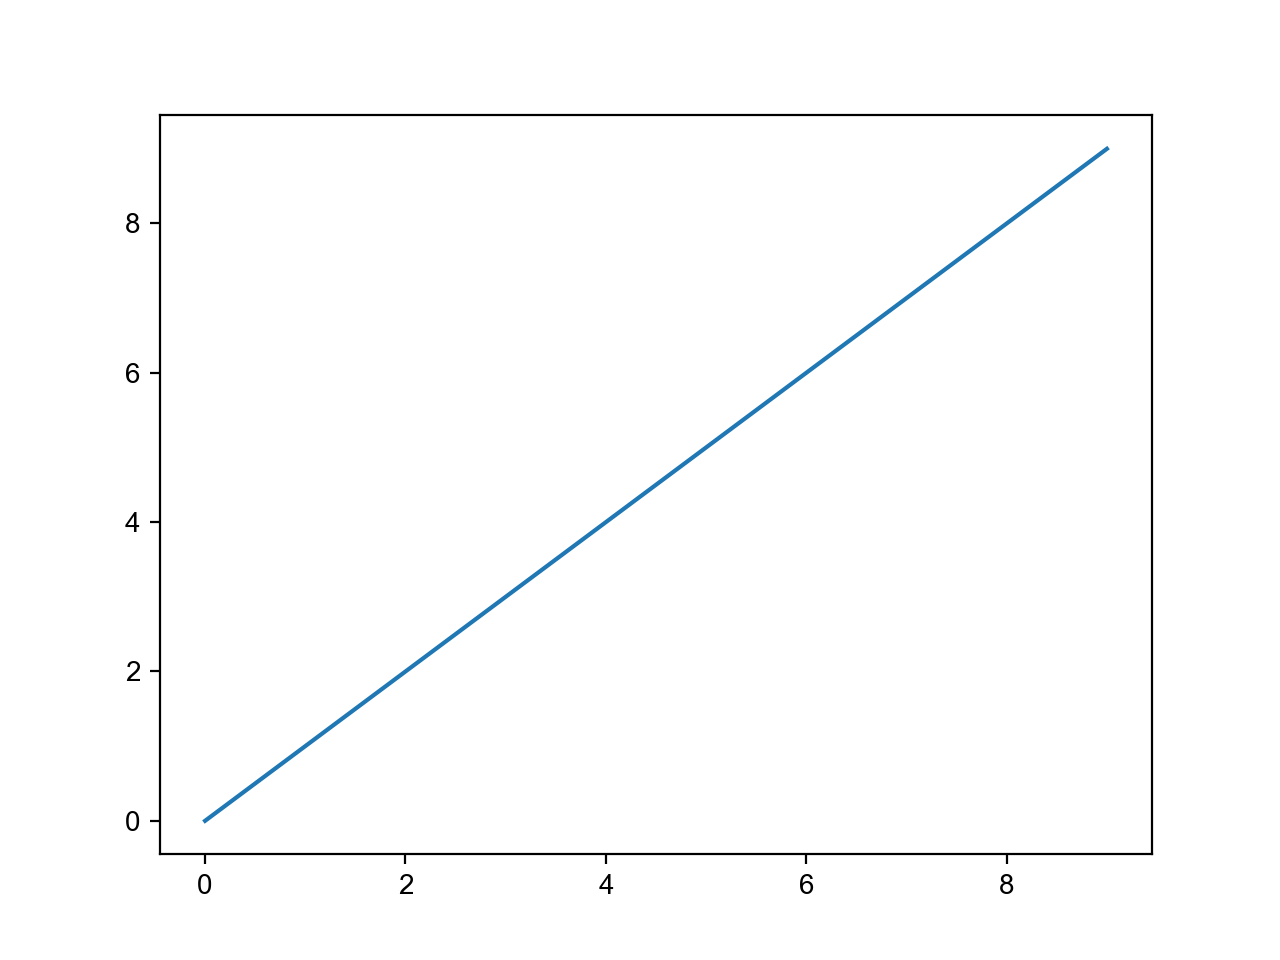

In [3]:
data = np.arange(10)
plt.plot(data)

### Figures and Subplots

Plots in matplotlib reside within a `Figure` object. You can create a new figure with `plt.figure`:

<IPython.core.display.Javascript object>


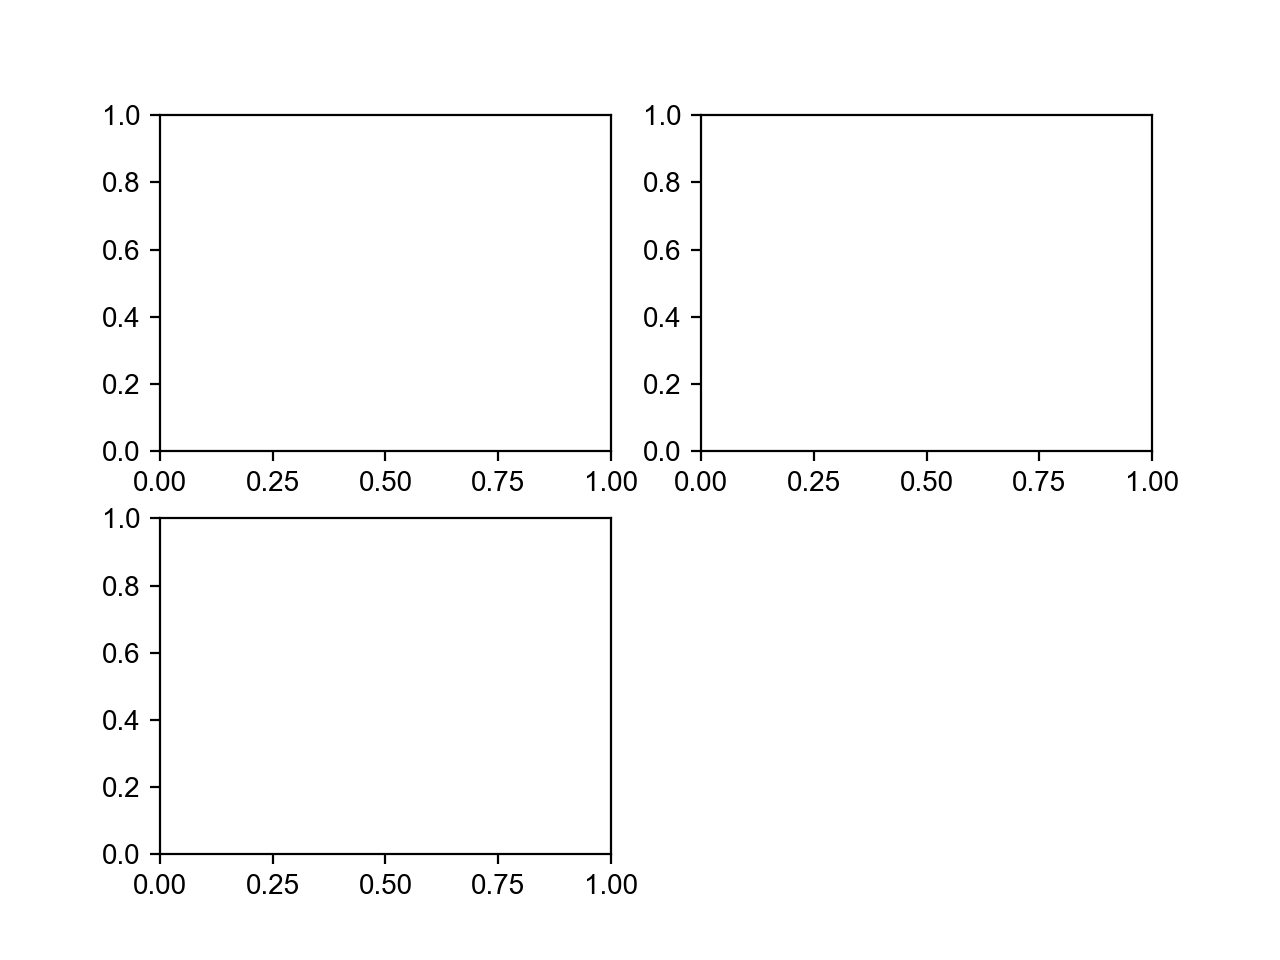

In [4]:
fig = plt.figure()

`plt.figure` has a number of options; notably, `figsize` will guarantee the figure has a certain size and aspect ratio if saved to disk.

You can’t make a plot with a blank figure. You have to create one or more `subplots` using `add_subplot`:

In [5]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

One nuance of using Jupyter notebooks is that plots are reset after each cell is evaluated, so for more complex plots you must put all of the plotting commands in a single notebook cell.

Here we run all of these commands in the same cell:

<IPython.core.display.Javascript object>


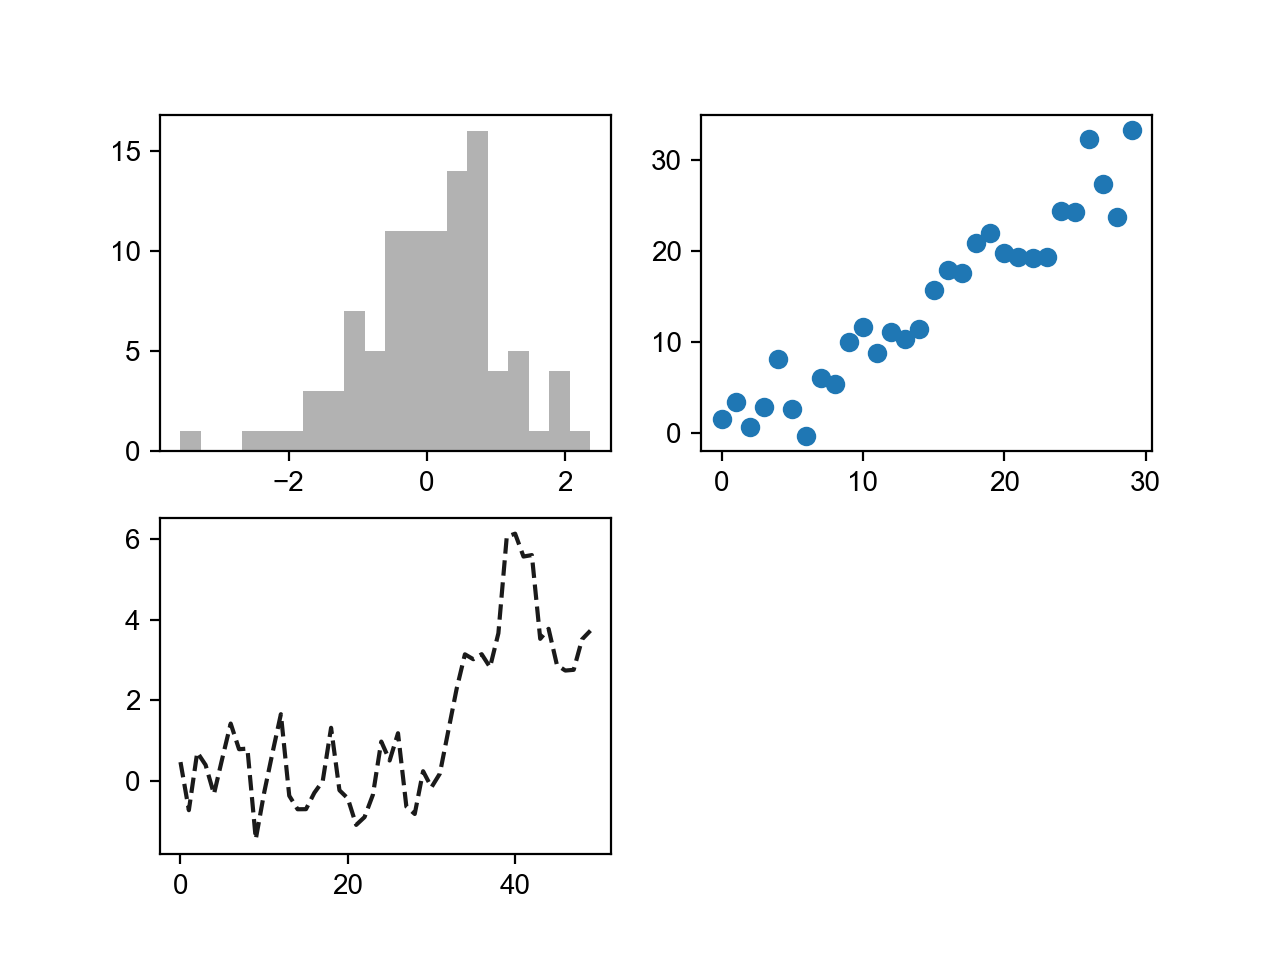

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

When you issue a plotting command like `plt.plot([1.5, 3.5, -2, 1.6])`, matplotlib draws on the last figure and subplot used (creating one if necessary), thus hiding the figure and subplot creation.

In [7]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

The `'k--'` is a *style* option instructing matplotlib to plot a black dashed line. The objects returned by `fig.add_subplot` here are `AxesSubplot` objects, on which you can directly plot on the other empty subplots by calling each one’s instance method:

In [8]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

matplotlib includes a convenience method, `plt.subplots`, that creates a new figure and returns a NumPy array containing the created subplot objects:

<IPython.core.display.Javascript object>


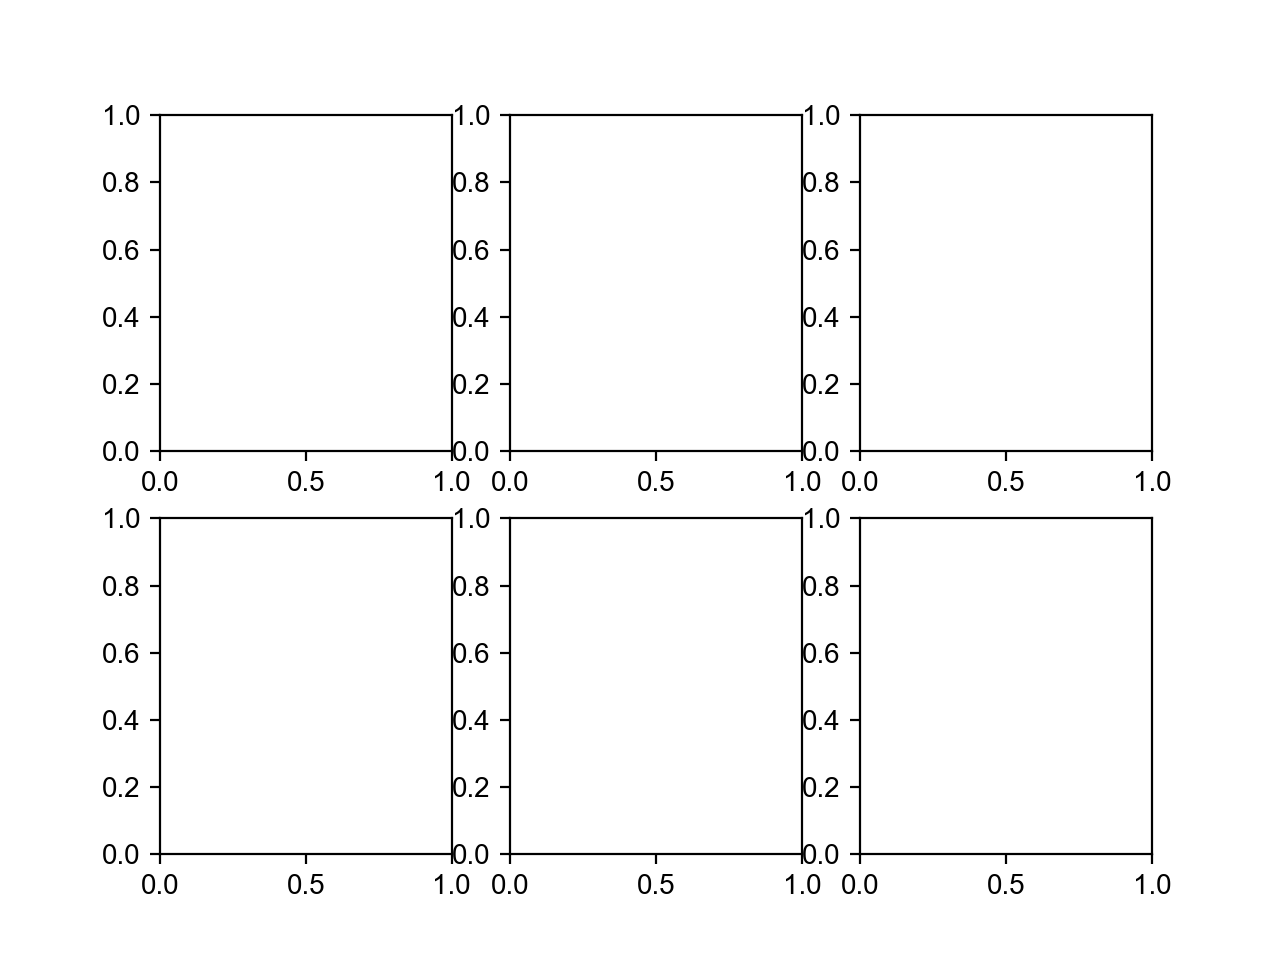

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [9]:
fig, axes = plt.subplots(2, 3)
axes

The axes array can be easily indexed like a two-dimensional array; for example, `axes[0, 1]`. You can also indicate that subplots should have the same x- or y-axis using `sharex` and `sharey`, respectively. This is especially useful when you’re comparing data on the same scale; otherwise, matplotlib autoscales plot limits independently.

#### Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots. This spacing is all specified relative to the height and width of the plot, so that if you resize the plot either programmatically or manually using the GUI window, the plot will dynamically adjust itself. You can change the spacing using the `subplots_adjust` method on `Figure` objects, also available as a top-level function:
```python
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
```

`wspace` and `hspace` controls the percent of the figure width and figure height, respectively, to use as spacing between subplots.

<IPython.core.display.Javascript object>


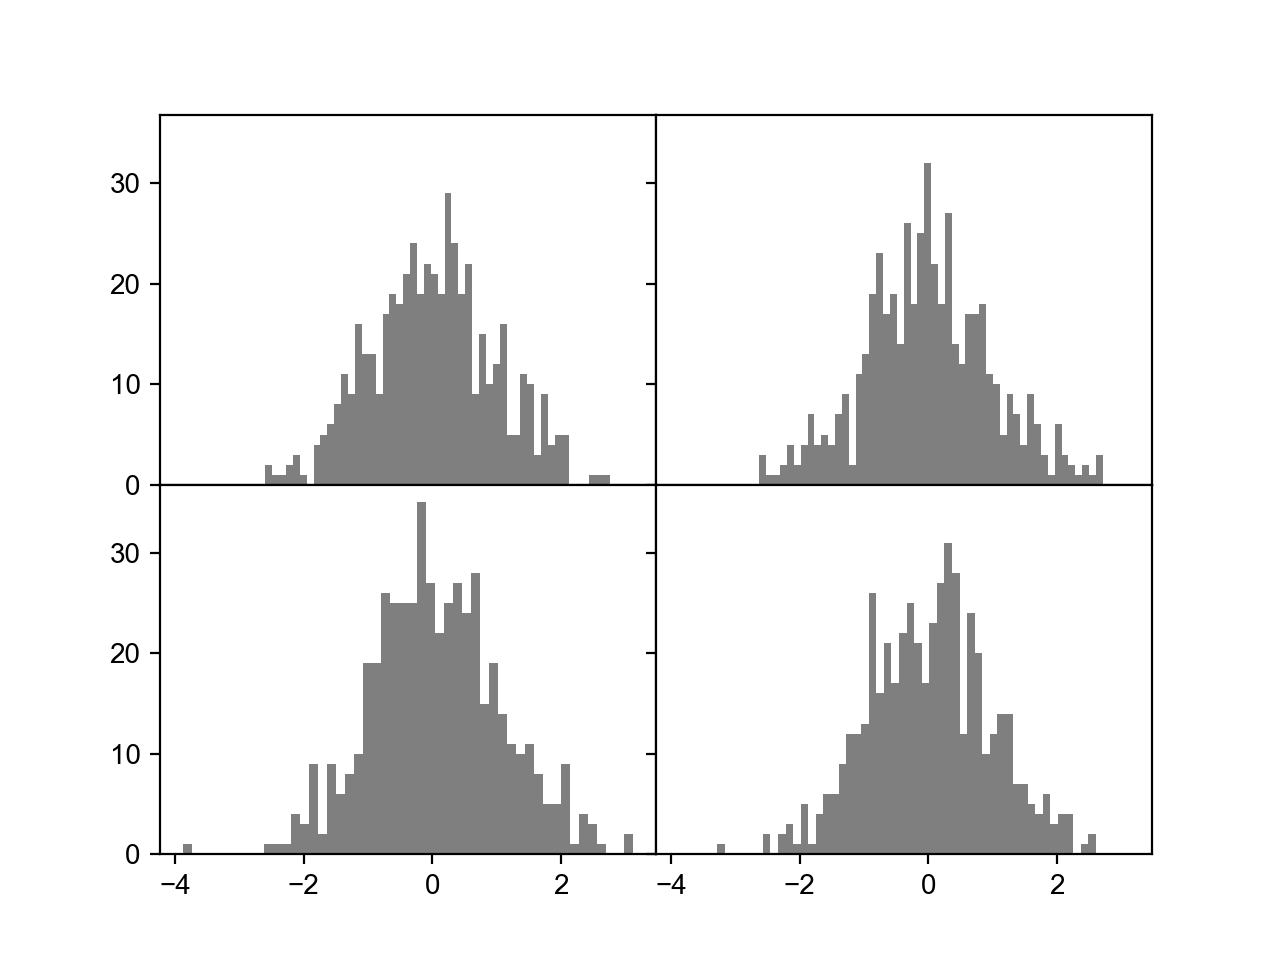

In [10]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

Matplotlib’s main `plot` function accepts arrays of x and y coordinates and optionally a string abbreviation indicating color and line style. For example, to plot `x` versus `y` with green dashes, you would execute:
```python
ax.plot(x, y, 'g--')
```

This way of specifying both color and line style in a string is provided as a convenience; in practice if you were creating plots programmatically you might prefer not to have to munge strings together to create plots with the desired style. The same plot could also have been expressed more explicitly as:
```python
ax.plot(x, y, linestyle='--', color='g')
```

There are a number of color abbreviations provided for commonly used colors, but you can use any color on the spectrum by specifying its hex code (e.g., `'#CECECE'`).

Line plots can additionally have *markers* to highlight the actual data points. Since matplotlib creates a continuous line plot, interpolating between points, it can occasionally be unclear where the points lie. The marker can be part of the style string, which must have color followed by marker type and line style:

<IPython.core.display.Javascript object>


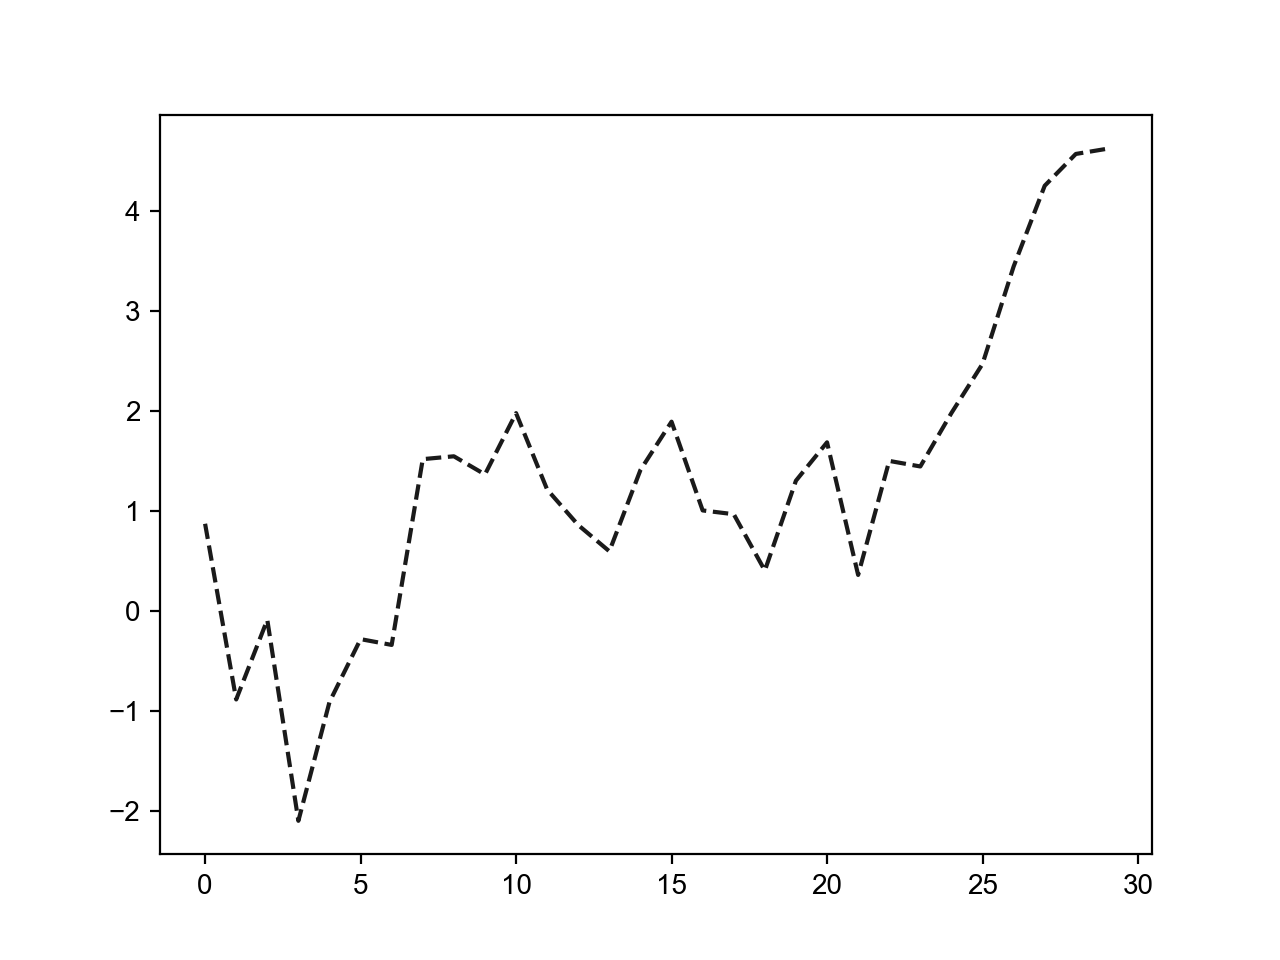

In [11]:
plt.figure()
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--')

<IPython.core.display.Javascript object>


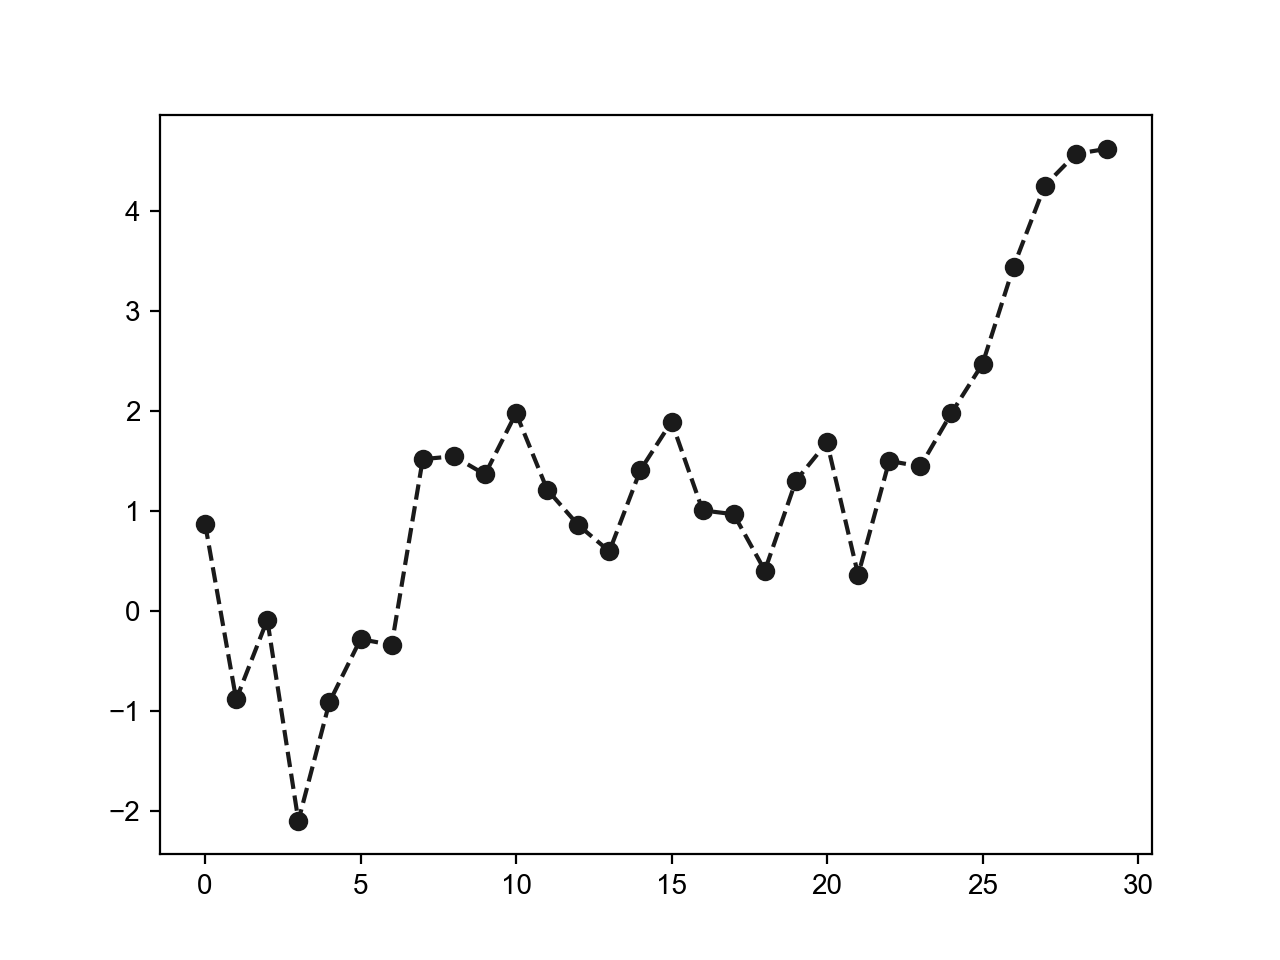

In [12]:
plt.figure()
plt.plot(data, 'ko--')

This could also have been written more explicitly as:

<IPython.core.display.Javascript object>


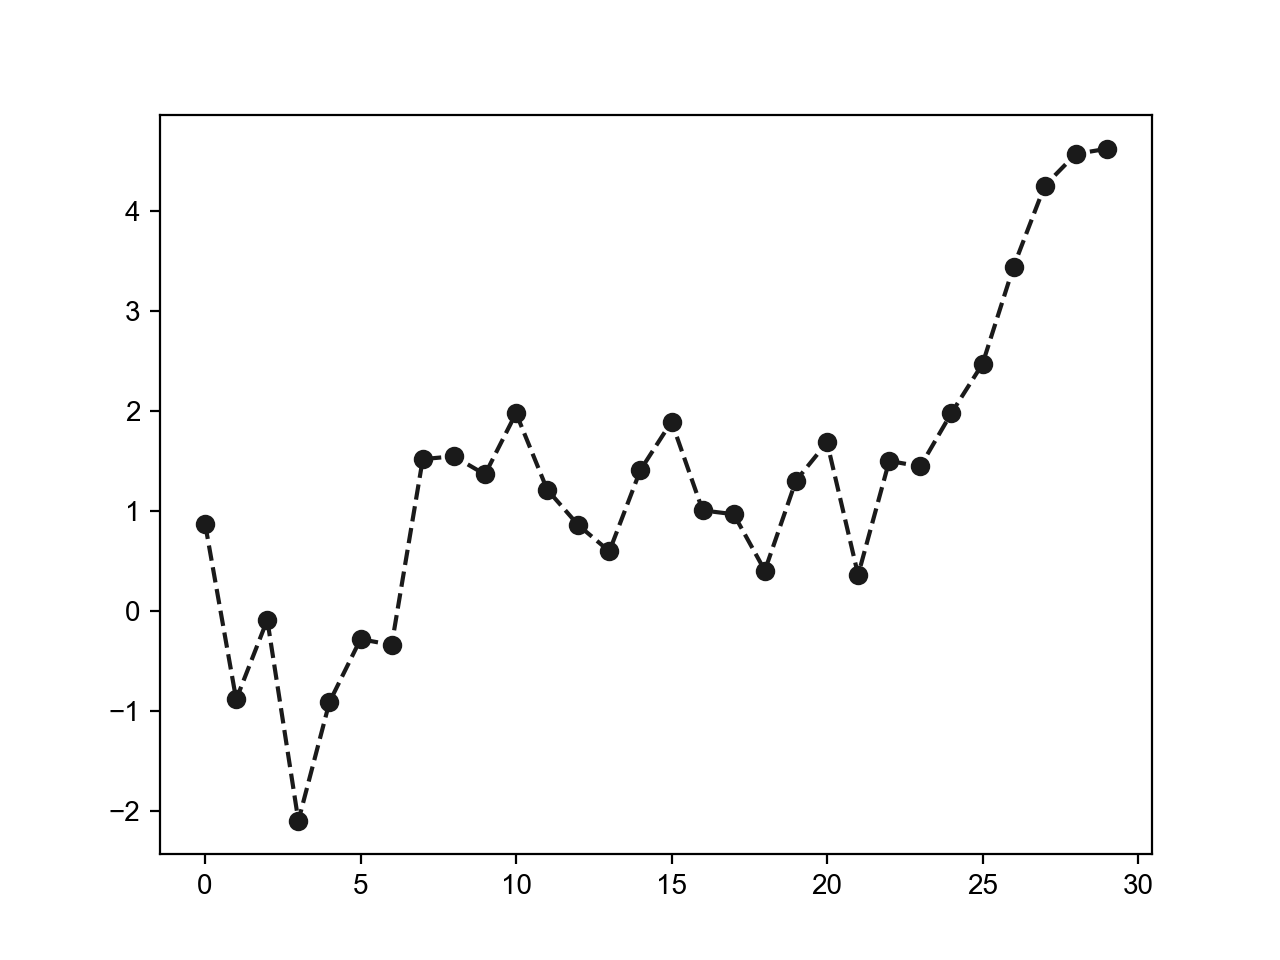

In [13]:
plt.figure()
plt.plot(data, color = 'k', linestyle = 'dashed', marker = 'o')

For line plots, you will notice that subsequent points are linearly interpolated by default. This can be altered with the `drawstyle` option:

<IPython.core.display.Javascript object>


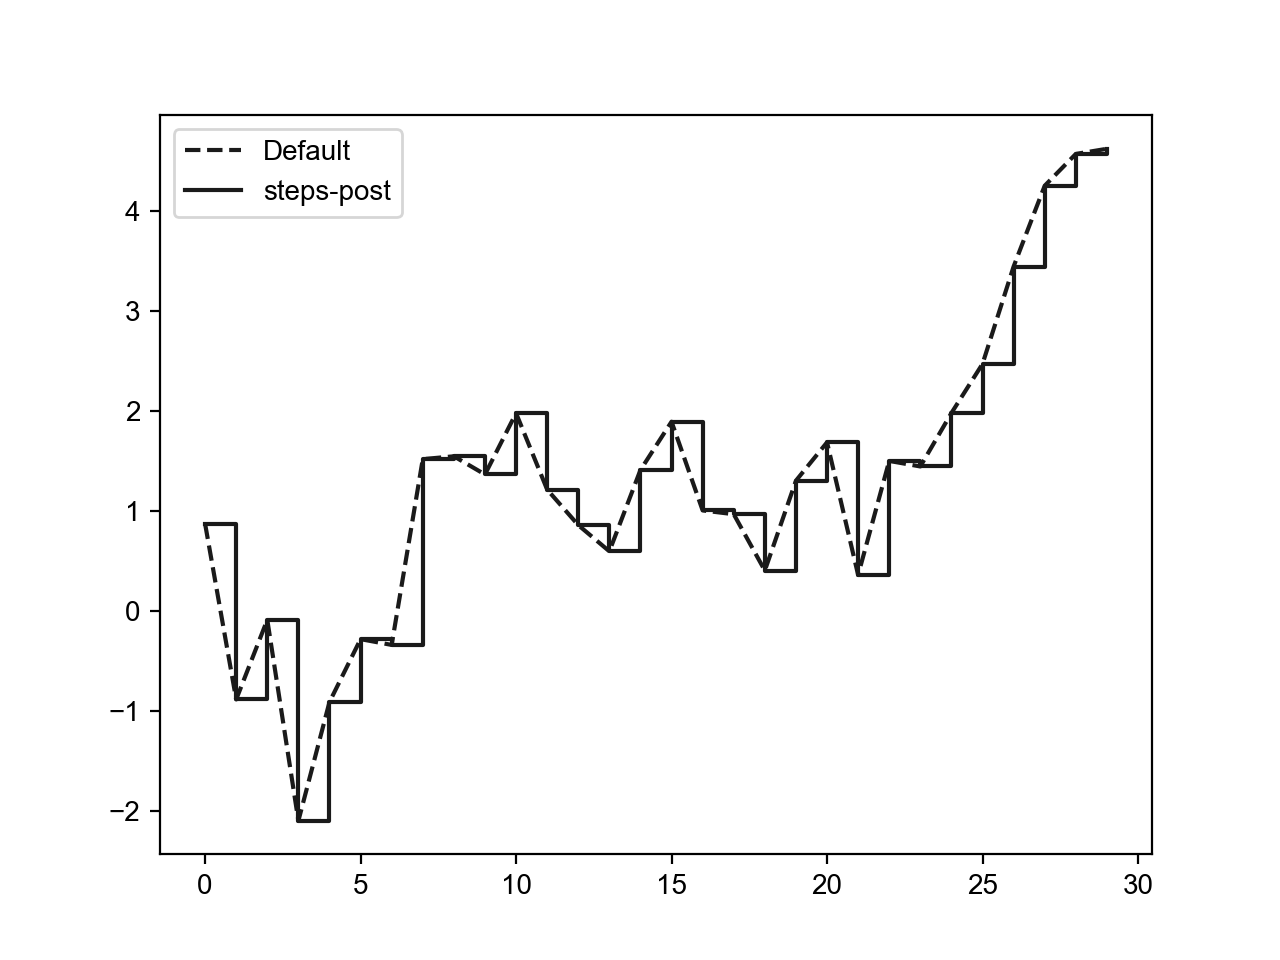

In [14]:
plt.figure()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

You must call `plt.legend` (or `ax.legend`, if you have a reference to the axes) to create the legend, whether or not you passed the `label` options when plotting the data.

### Ticks, Labels, and Legends

For most kinds of plot decorations, there are two main ways to do things: using the procedural `pyplot` interface (i.e., `matplotlib.pyplot`) and the more object-oriented native matplotlib API.

The `pyplot` interface, designed for interactive use, consists of methods like `xlim`, `xticks`, and `xticklabels`. These control the plot range, tick locations, and tick labels, respectively. They can be used in two ways:
- Called with no arguments returns the current parameter value (e.g., `plt.xlim()` returns the current x-axis plotting range)
- Called with parameters sets the parameter value (e.g., `plt.xlim([0, 10])`, sets the x-axis range to 0 to 10)

All such methods act on the active or most recently created `AxesSubplot`. Each of them corresponds to two methods on the subplot object itself; in the case of xlim these are `ax.get_xlim` and `ax.set_xlim`.

#### Setting the title, axis labels, ticks, and ticklabels

<IPython.core.display.Javascript object>


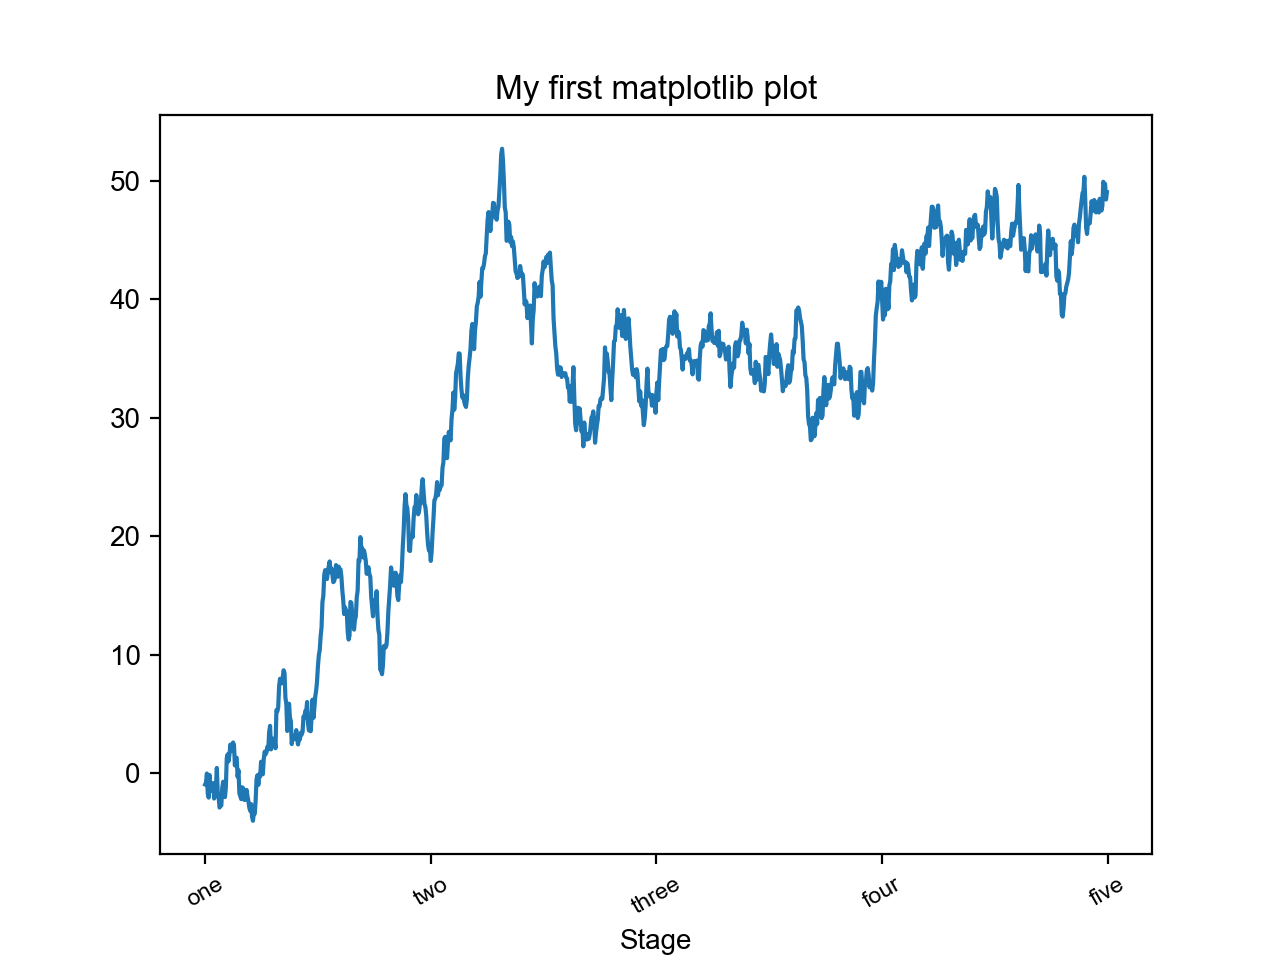

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [16]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

In [17]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stage')

Text(0.5, 0, 'Stage')

Modifying the y-axis consists of the same process, substituting `y` for `x` in the above. The axes class has a set method that allows batch setting of plot properties. From the prior example, we could also have written:
```python
props = {
    'title': 'My first matplotlib plot', 
    'xlabel': 'Stages'
}
ax.set(**props)
```

#### Adding legends

Legends are another critical element for identifying plot elements. There are a couple of ways to add one. The easiest is to pass the `label` argument when adding each piece of the plot:

<IPython.core.display.Javascript object>


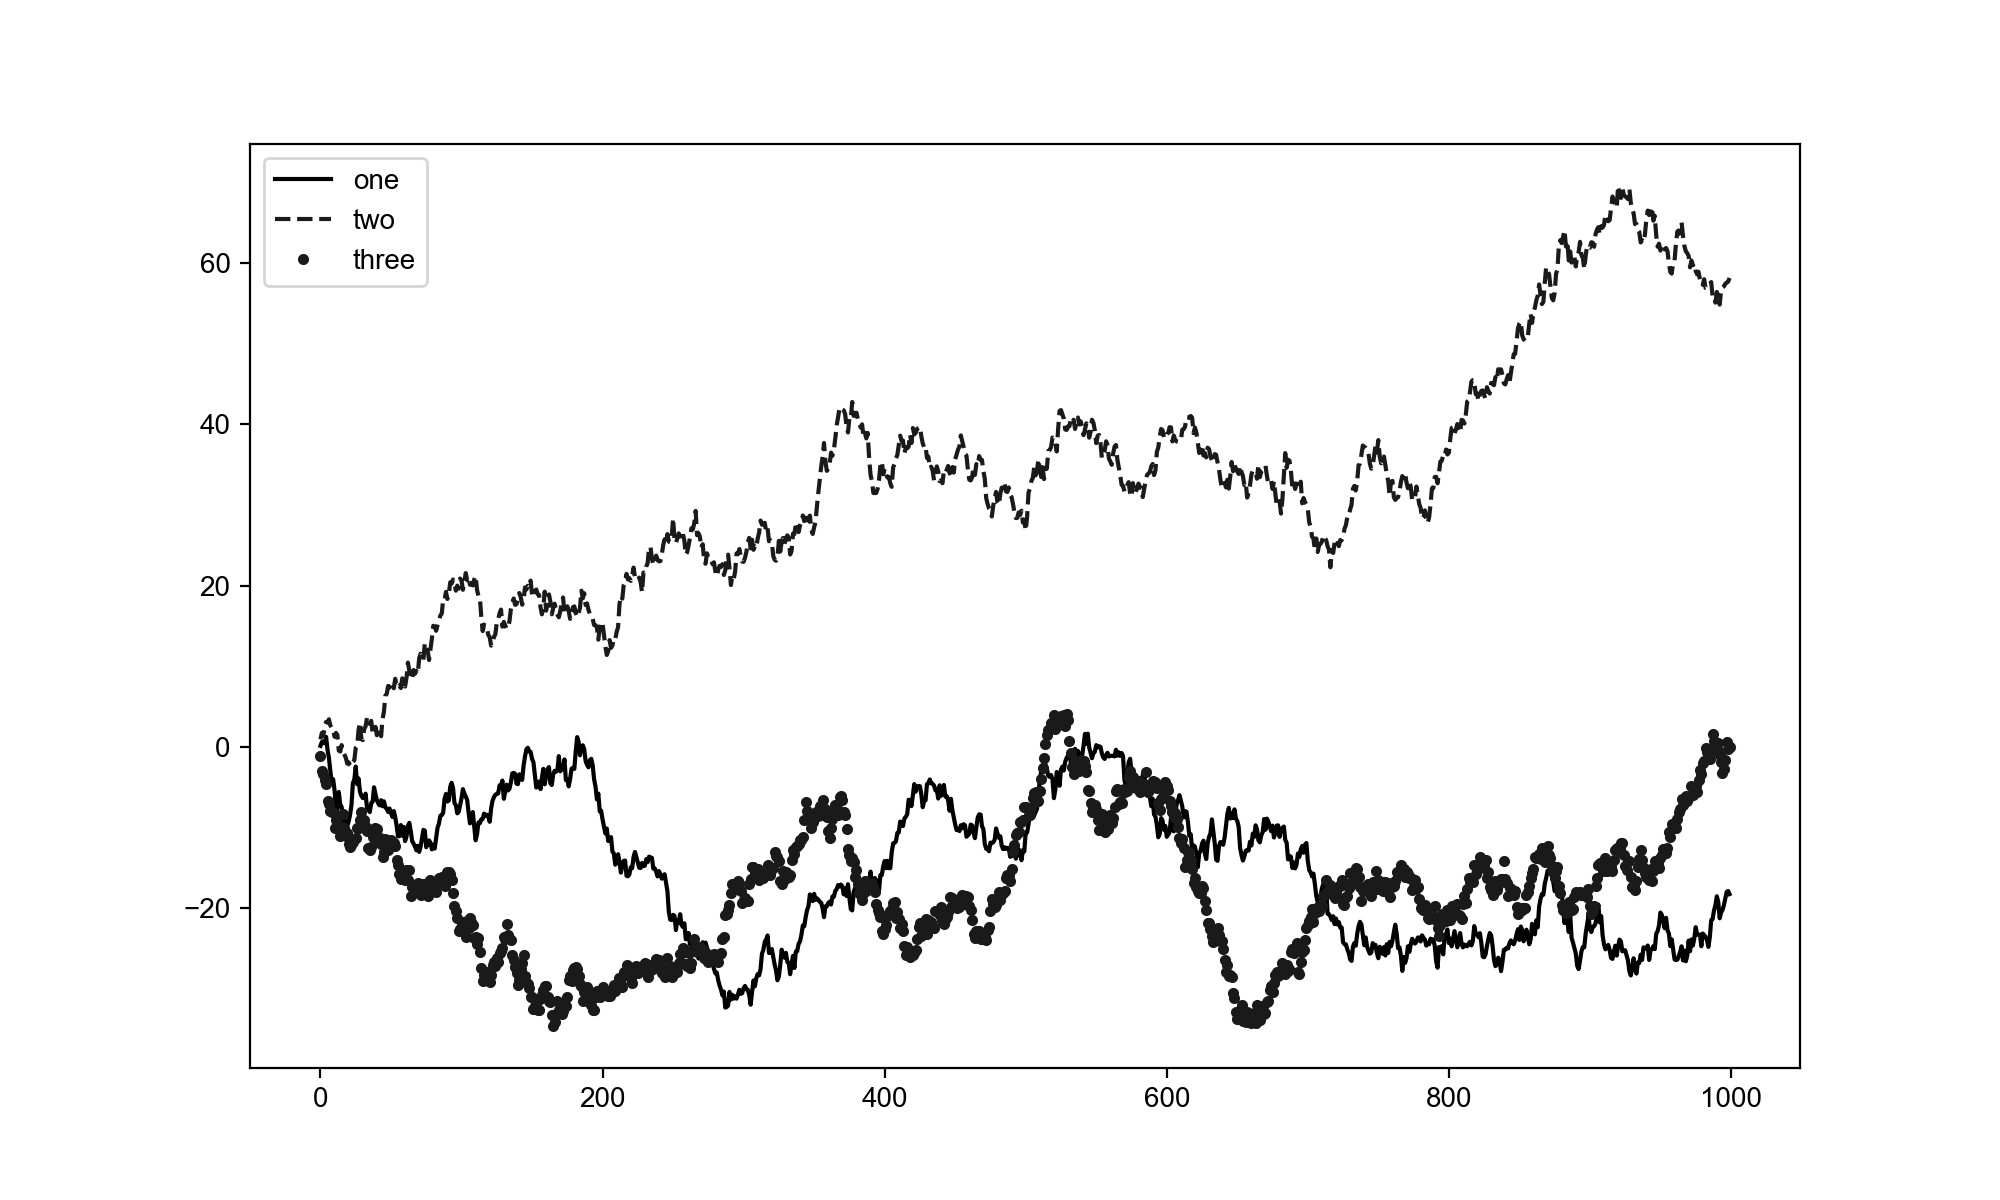

In [18]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')

Once you’ve done this, you can either call `ax.legend()` or `plt.legend()` to automatically create a legend.

In [19]:
ax.legend(loc='best')

The legend method has several other choices for the location `loc` argument. The `loc` tells matplotlib where to place the plot. If you aren’t picky, `'best'` is a good option, as it will choose a location that is most out of the way. To exclude one or more elements from the legend, pass no label or `label='_nolegend_'`.

### Annotations and Drawing on a Subplot

You can add annotations and text using the `text`, `arrow`, and `annotate` functions. `text` draws text at given coordinates `(x, y)` on the plot with optional custom styling:
```python
ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)
```

<IPython.core.display.Javascript object>


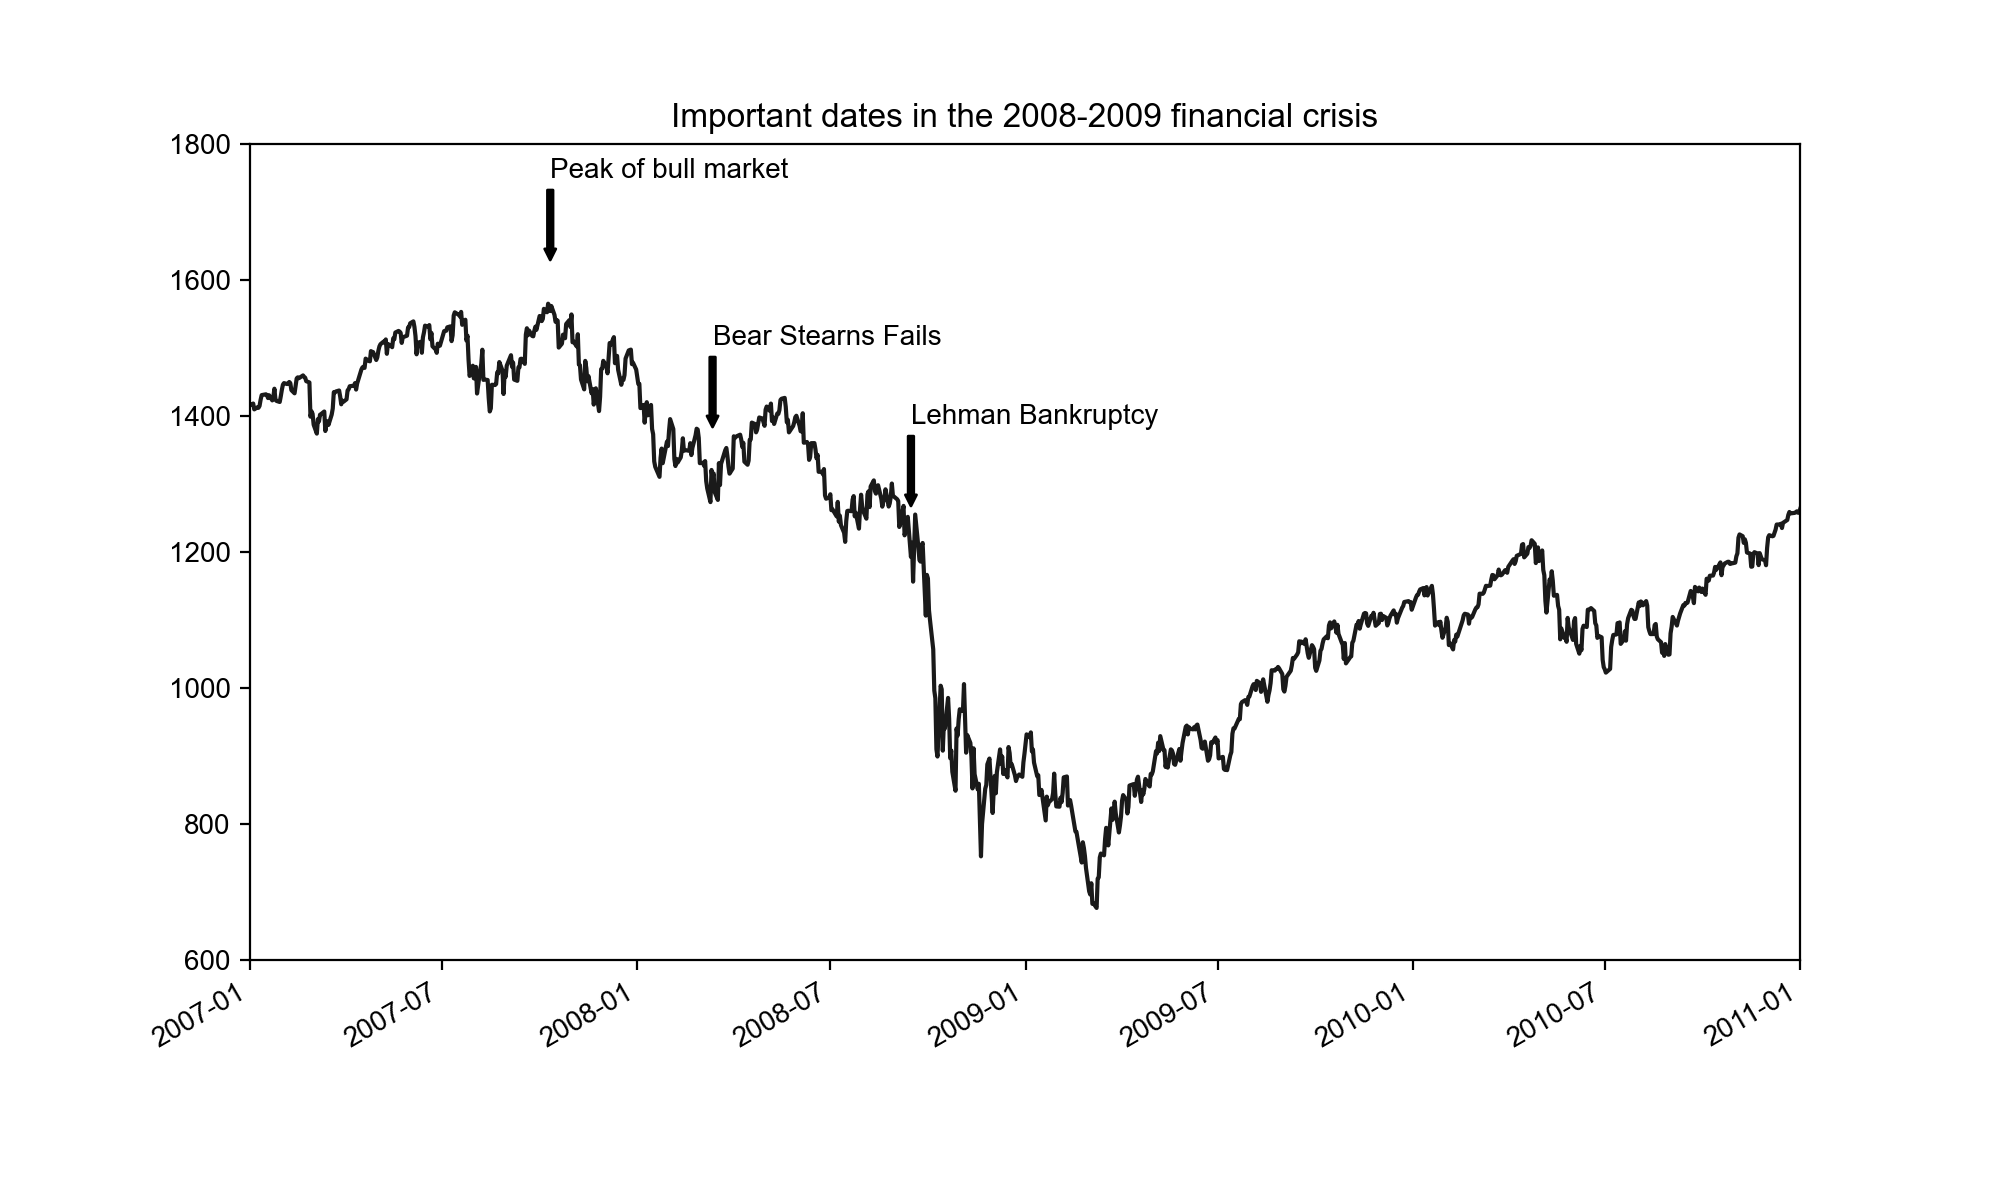

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [20]:
from datetime import datetime

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('stock_px_2.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'), 
    (datetime(2008, 3, 12), 'Bear Stearns Fails'), 
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, 
                xy=(date, spx.asof(date) + 75), 
                xytext=(date, spx.asof(date) + 225), 
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4), 
                horizontalalignment='left', 
                verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

Drawing shapes requires some more care. matplotlib has objects that represent many common shapes, referred to as *patches*. Some of these, like `Rectangle` and `Circle`, are found in `matplotlib.pyplot`, but the full set is located in `matplotlib.patches`.

To add a shape to a plot, you create the patch object `shp` and add it to a subplot by calling `ax.add_patch(shp)`:

<IPython.core.display.Javascript object>


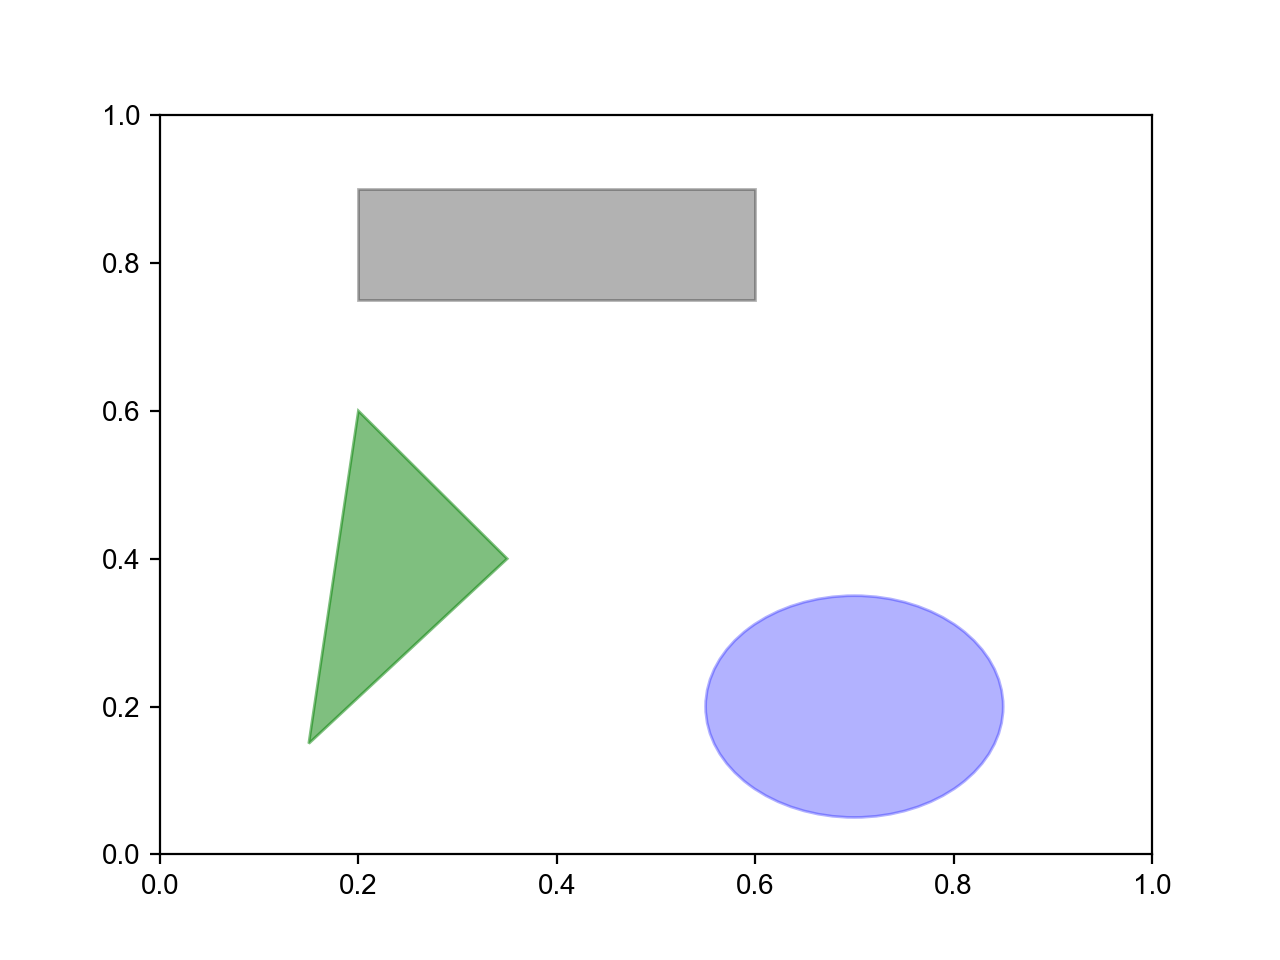

In [21]:
fig = plt.figure()
ax = fig.add_subplot()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

You can save the active figure to file using `plt.savefig`. This method is equivalent to the figure object’s `savefig` instance method. For example, to save an SVG version of a figure, you need only type:
```python
plt.savefig('figpath.svg')
```
The file type is inferred from the file extension. So if you used `.pdf` instead, you would get a PDF.

There are a couple of important options:
- `dpi`: controls the dots-per-inch resolution
- `bbox_inches`: trims the whitespace around the actual figure

To get the same plot as a PNG with minimal whitespace around the plot and at 400 DPI, you would do:
```python
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

`savefig` doesn’t have to write to disk; it can also write to any file-like object, such as a `BytesIO`:
```python
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
```

### matplotlib Configuration

One way to modify the configuration programmatically from Python is to use the `rc` method; for example, to set the global default figure size to be 10 $\times$ 10, you could enter:
```python
plt.rc('figure', figsize=(10, 10))
```
The first argument to `rc` is the component you wish to customize, such as `'figure'`, `'axes'`, `'xtick'`, `'ytick'`, `'grid'`, `'legend'`, or many others. After that can follow a sequence of keyword arguments indicating the new parameters. An easy way to write down the options in your program is as a dict:
```python
font_options = {'family' : 'monospace', 'weight' : 'bold', 'size' :'small'}
plt.rc('font', **font_options)
```

For more extensive customization and to see a list of all the options, matplotlib comes with a configuration file *matplotlibrc* in the *matplotlib/mpl-data* directory. If you customize this file and place it in your home directory titled *.matplotlibrc*, it will be loaded each time you use matplotlib.

## 9.2   Plotting with pandas and seaborn

matplotlib can be a fairly low-level tool. You assemble a plot from its base components: the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.), legend, title, tick labels, and other annotations.

In pandas we may have multiple columns of data, along with row and column labels. pandas itself has built-in methods that simplify creating visualizations from DataFrame and Series objects.

Another library is `seaborn`, a statistical graphics library which simplifies creating many common visualization types.

### Line Plots

Series and DataFrame each have a plot attribute for making some basic `plot` types. By default, `plot()` makes line plots:

<IPython.core.display.Javascript object>


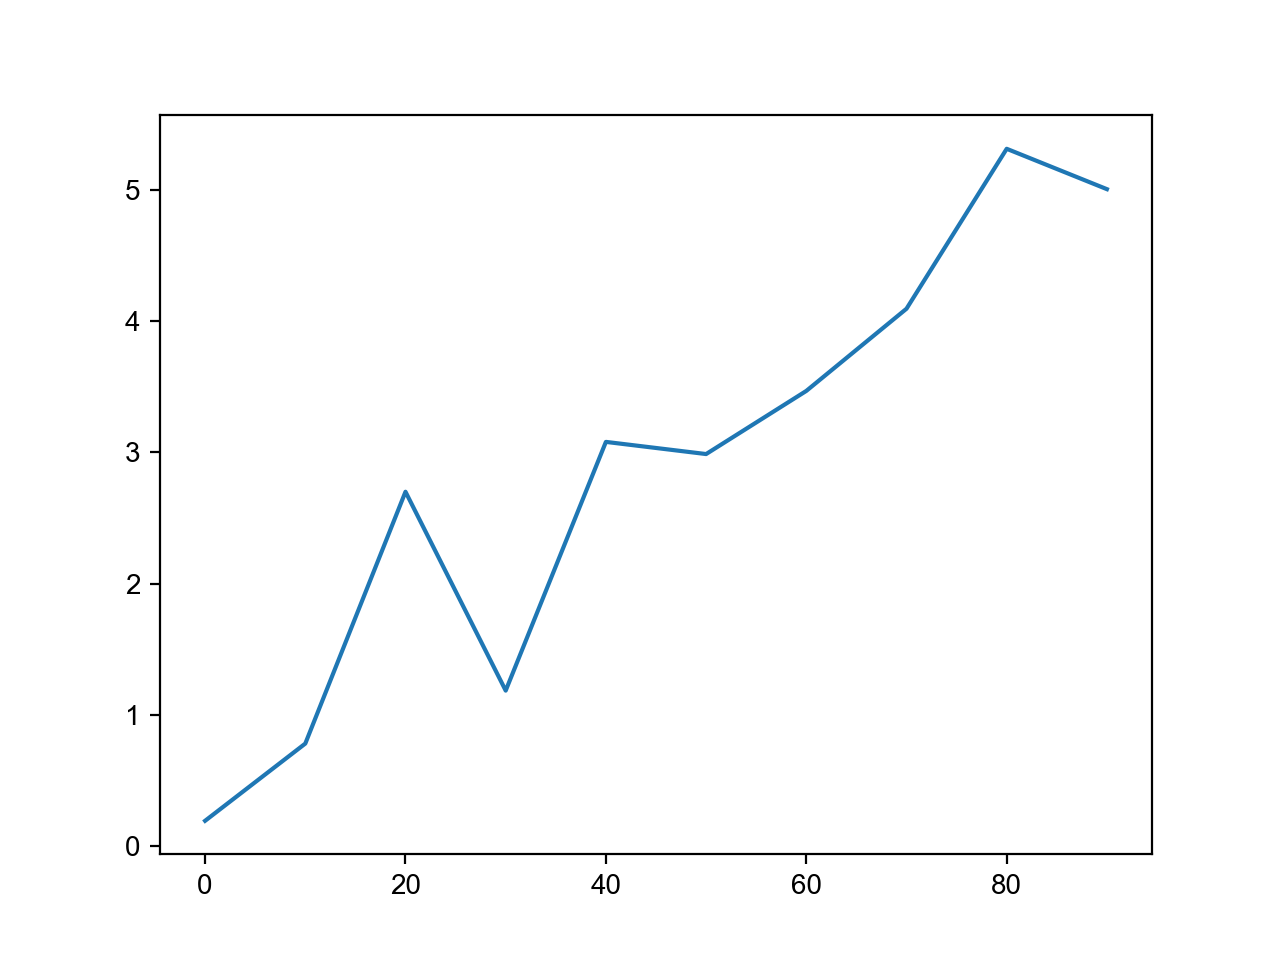

<AxesSubplot:>

In [22]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
plt.figure()
s.plot()

The Series object’s index is passed to matplotlib for plotting on the x-axis, though you can disable this by passing `use_index=False`. The x-axis ticks and limits can be adjusted with the `xticks` and `xlim` options, and y-axis respectively with `yticks` and `ylim`.

Most of pandas’s plotting methods accept an optional `ax` parameter, which can be a matplotlib subplot object. This gives you more flexible placement of subplots in a grid layout.

DataFrame’s `plot` method plots each of its columns as a different line on the same subplot, creating a legend automatically:

<IPython.core.display.Javascript object>


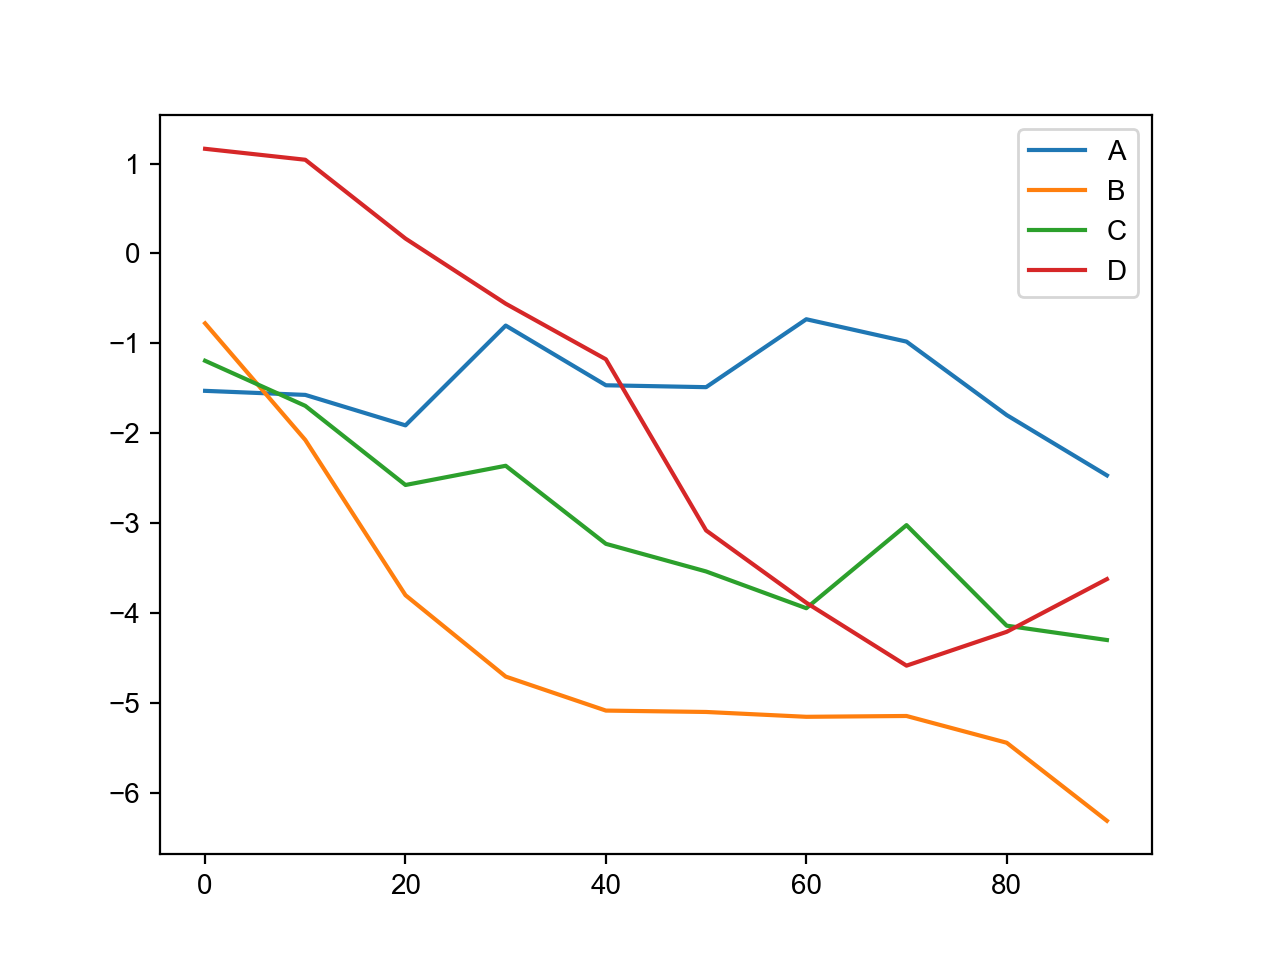

<AxesSubplot:>

In [23]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df.plot()

The plot attribute contains a “family” of methods for different plot types. For example, `df.plot()` is equivalent to `df.plot.line()`.

### Bar Plots

The `plot.bar()` and `plot.barh()` make vertical and horizontal bar plots, respectively. In this case, the Series or DataFrame index will be used as the x (`bar`) or y (`barh`) ticks:

<IPython.core.display.Javascript object>


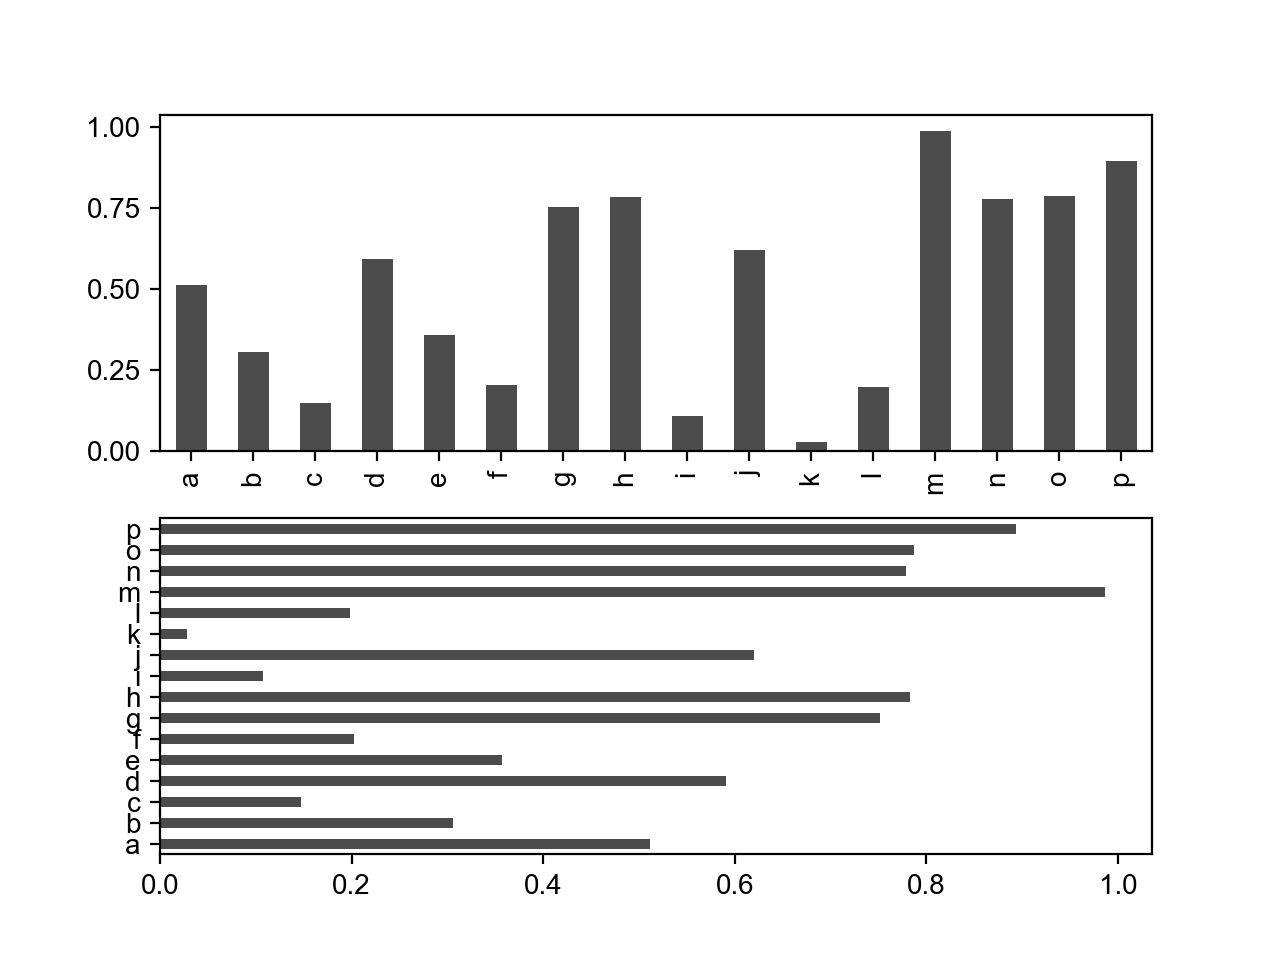

<AxesSubplot:>

In [24]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [25]:
df = pd.DataFrame(np.random.rand(6, 4), 
                  index=['one', 'two', 'three', 'four', 'five', 'six'], 
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus         A         B         C         D
one    0.599801  0.792092  0.401488  0.082822
two    0.465235  0.758329  0.315312  0.124949
three  0.618776  0.607883  0.499912  0.286967
four   0.580708  0.841415  0.043551  0.310274
five   0.525573  0.456890  0.656468  0.356067
six    0.644423  0.073856  0.011936  0.845781

<IPython.core.display.Javascript object>


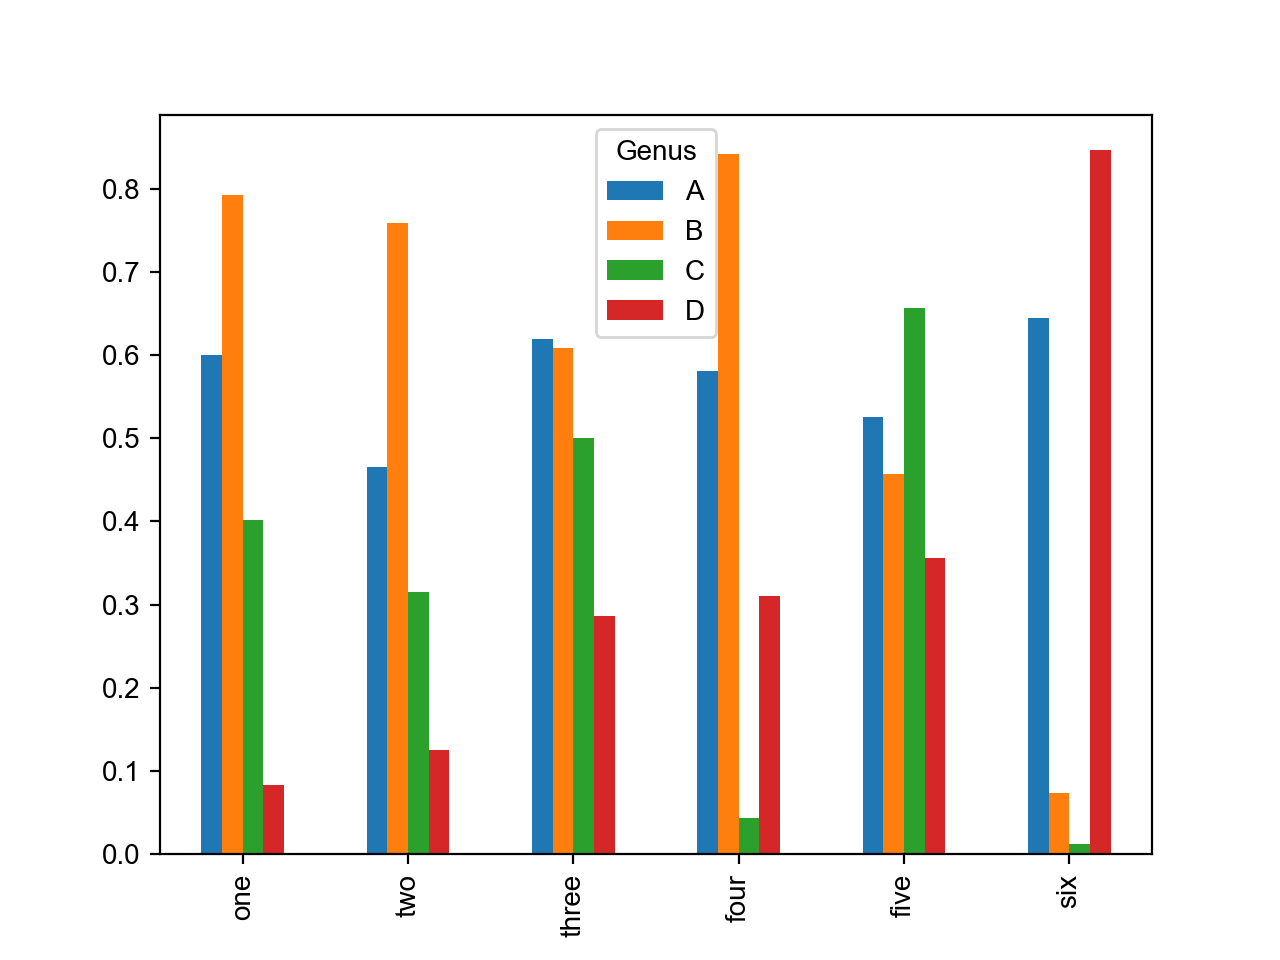

<AxesSubplot:>

In [26]:
df.plot.bar()

We create stacked bar plots from a DataFrame by passing `stacked=True`, resulting in the value in each row being stacked together:

<IPython.core.display.Javascript object>


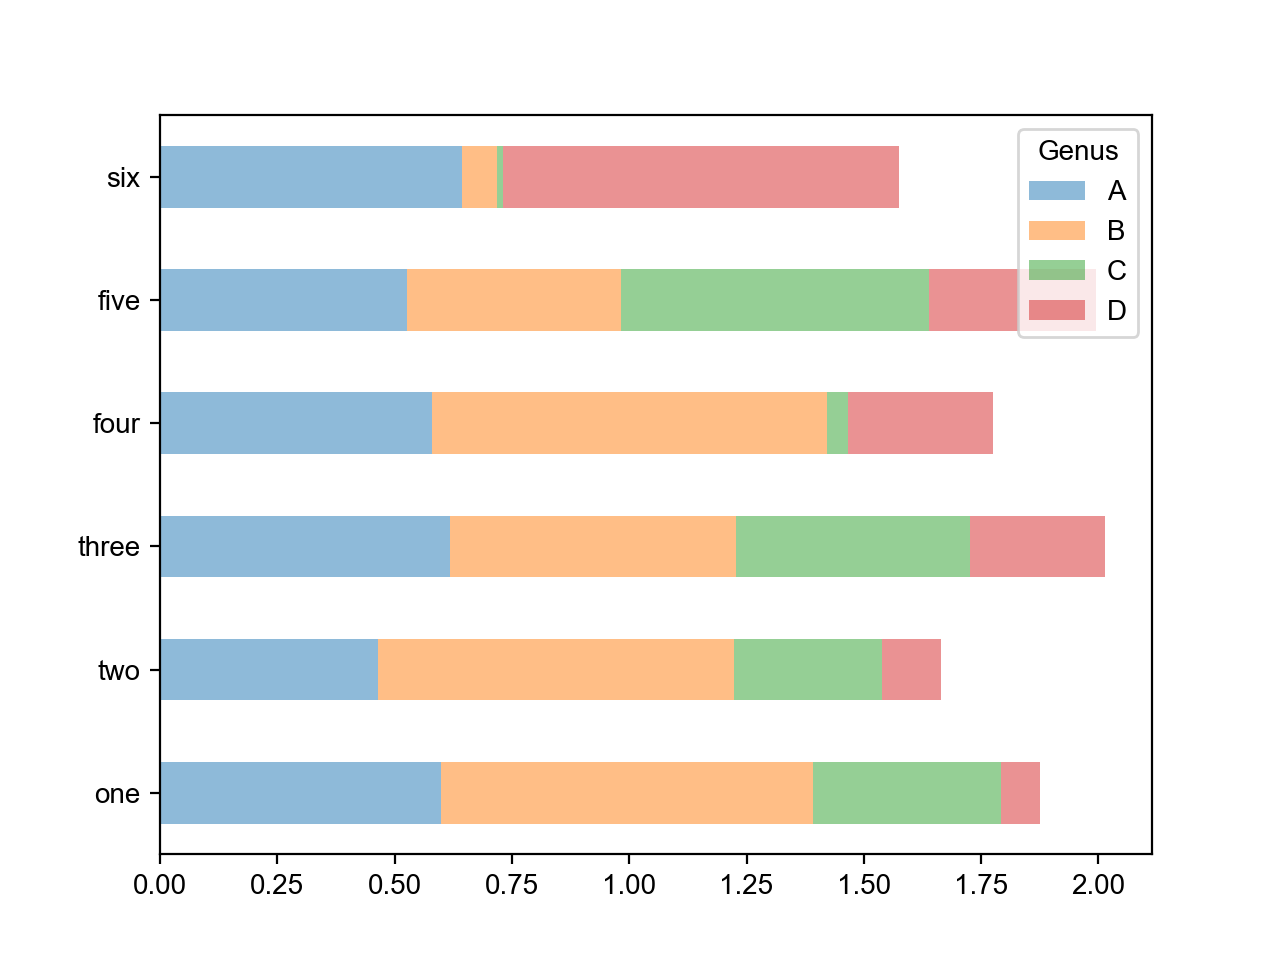

<AxesSubplot:>

In [27]:
df.plot.barh(stacked=True, alpha=0.5)

A useful recipe for bar plots is to visualize a Series’s value frequency using `value_counts`: `s.value_counts().plot.bar()`.

In [28]:
tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3

In [29]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241

<IPython.core.display.Javascript object>


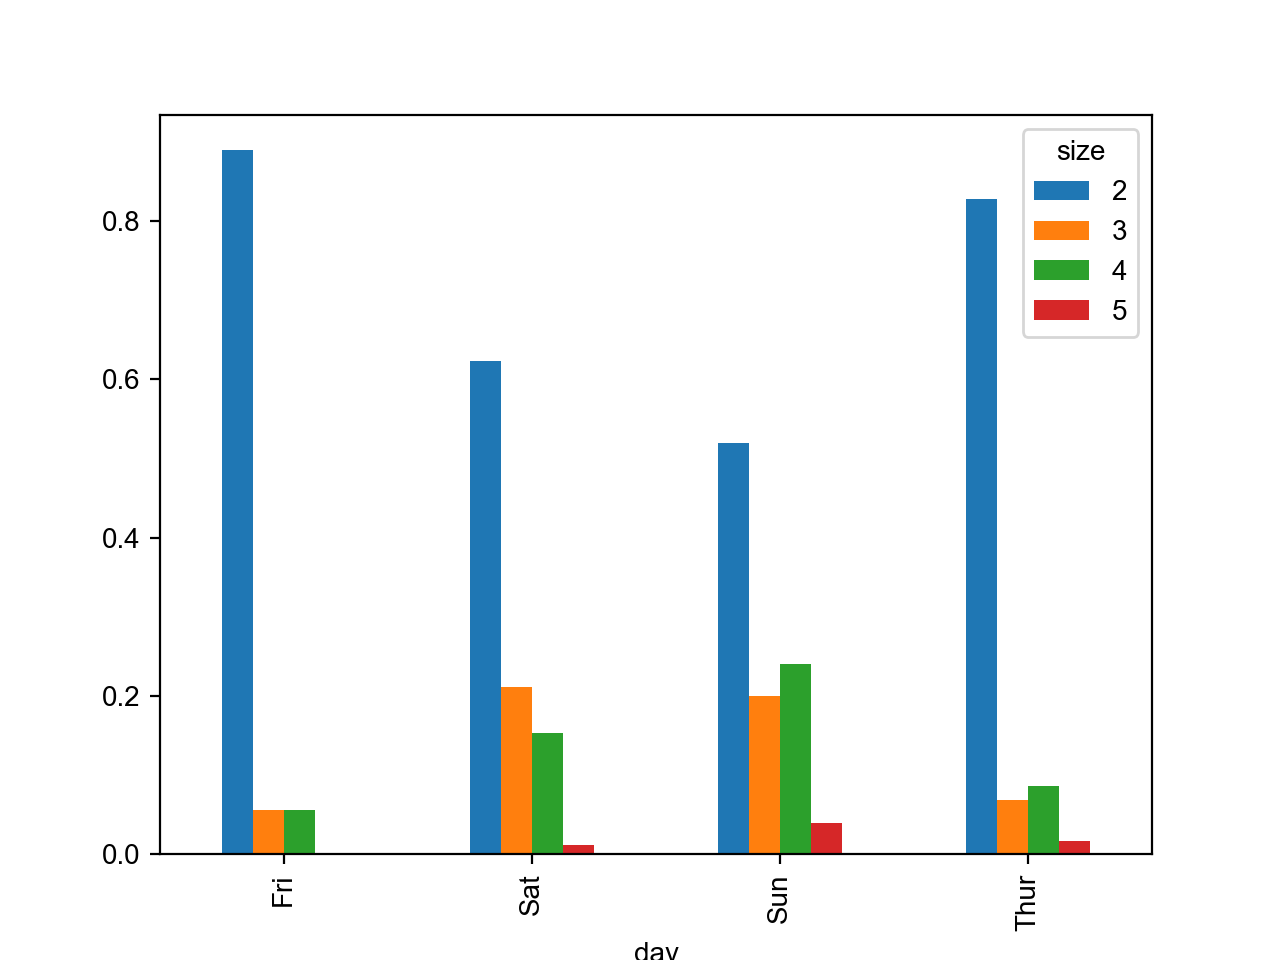

<AxesSubplot:xlabel='day'>

In [30]:
party_pcts.plot.bar()

With data that requires aggregation or summarization before making a plot, using the `seaborn` package can make things much simpler.

In [31]:
import seaborn as sns

In [32]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.063204
1       10.34  1.66    Male     No  Sun  Dinner     3  0.191244
2       21.01  3.50    Male     No  Sun  Dinner     3  0.199886
3       23.68  3.31    Male     No  Sun  Dinner     2  0.162494
4       24.59  3.61  Female     No  Sun  Dinner     4  0.172069

<IPython.core.display.Javascript object>


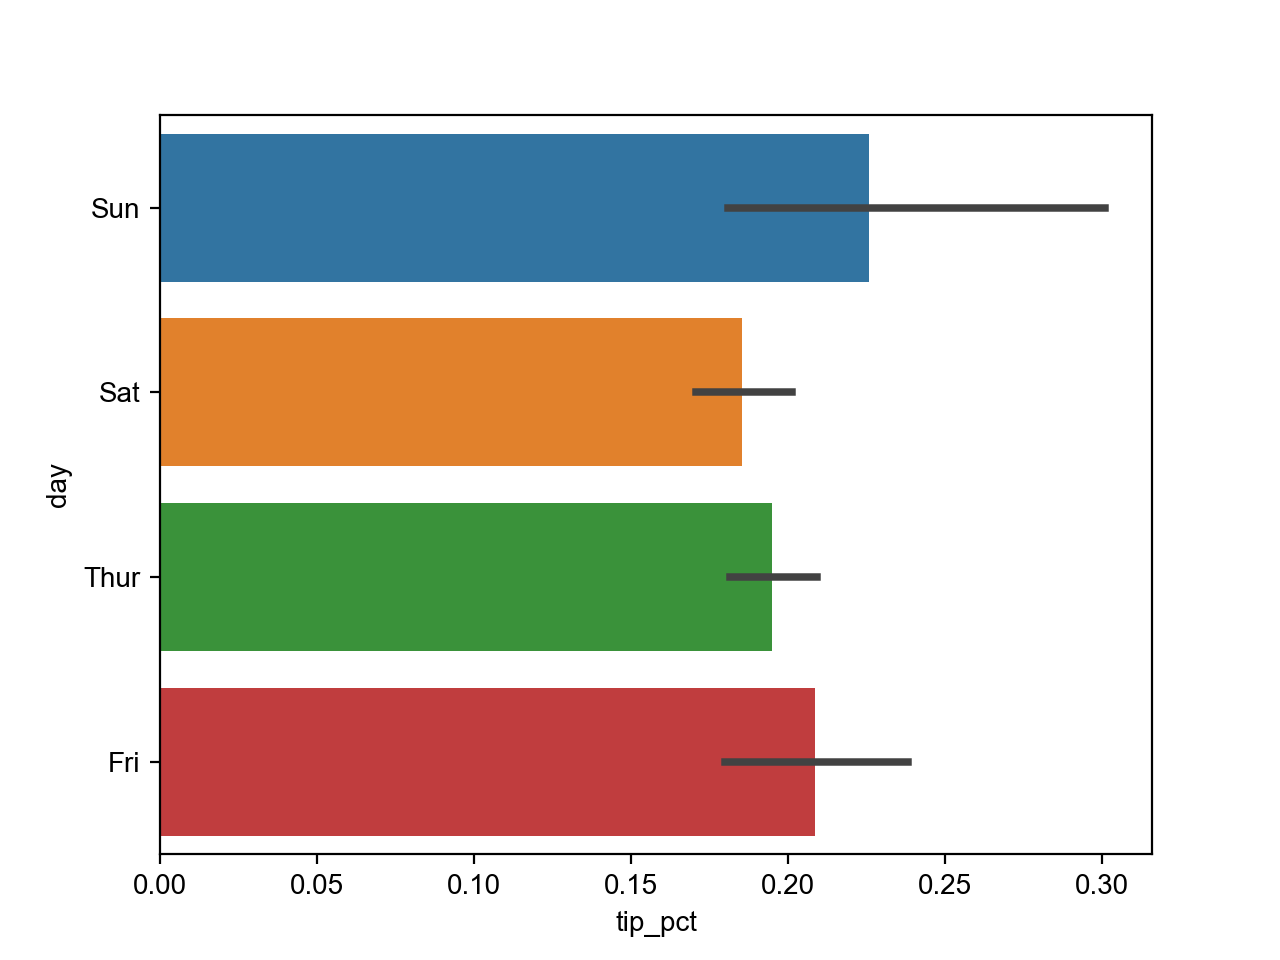

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [33]:
plt.figure()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Because there are multiple observations for each value in the day, the bars are the average value of `tip_pct`. The black lines drawn on the bars represent the 95% confidence interval (this can be configured through optional arguments).

`seaborn.barplot` has a `hue` option that enables us to split by an additional categorical value:

/var/folders/nn/d80th7m132b3092l0t8kqnr00000gn/T/ipykernel_21342/2356976742.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


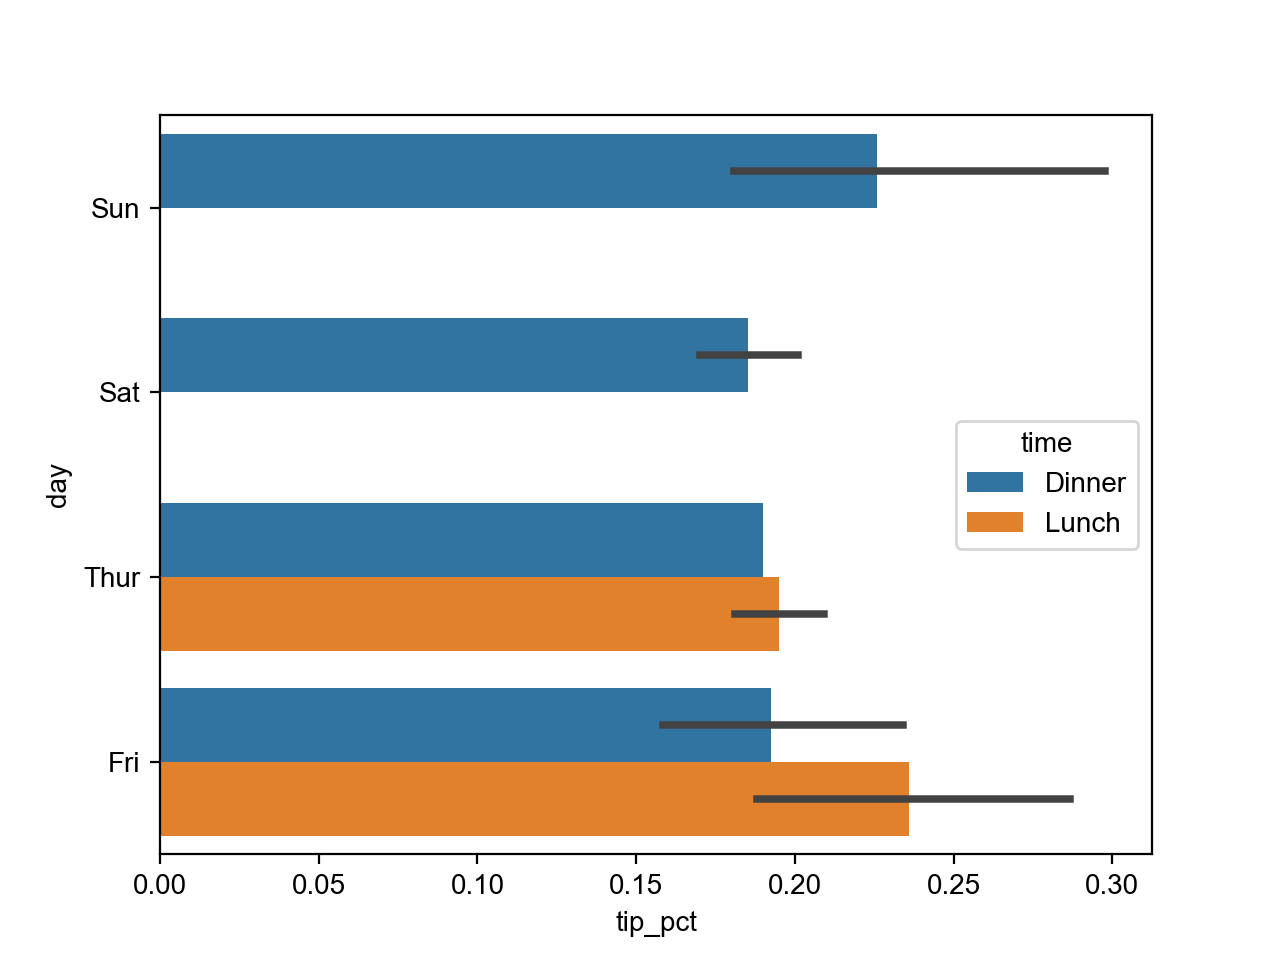

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [34]:
plt.figure()
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

Notice that seaborn has automatically changed the aesthetics of plots: the default color palette, plot background, and grid line colors. You can switch between different plot appearances using `seaborn.set`:

In [35]:
sns.set(style='whitegrid')

### Histograms and Density Plots

<IPython.core.display.Javascript object>


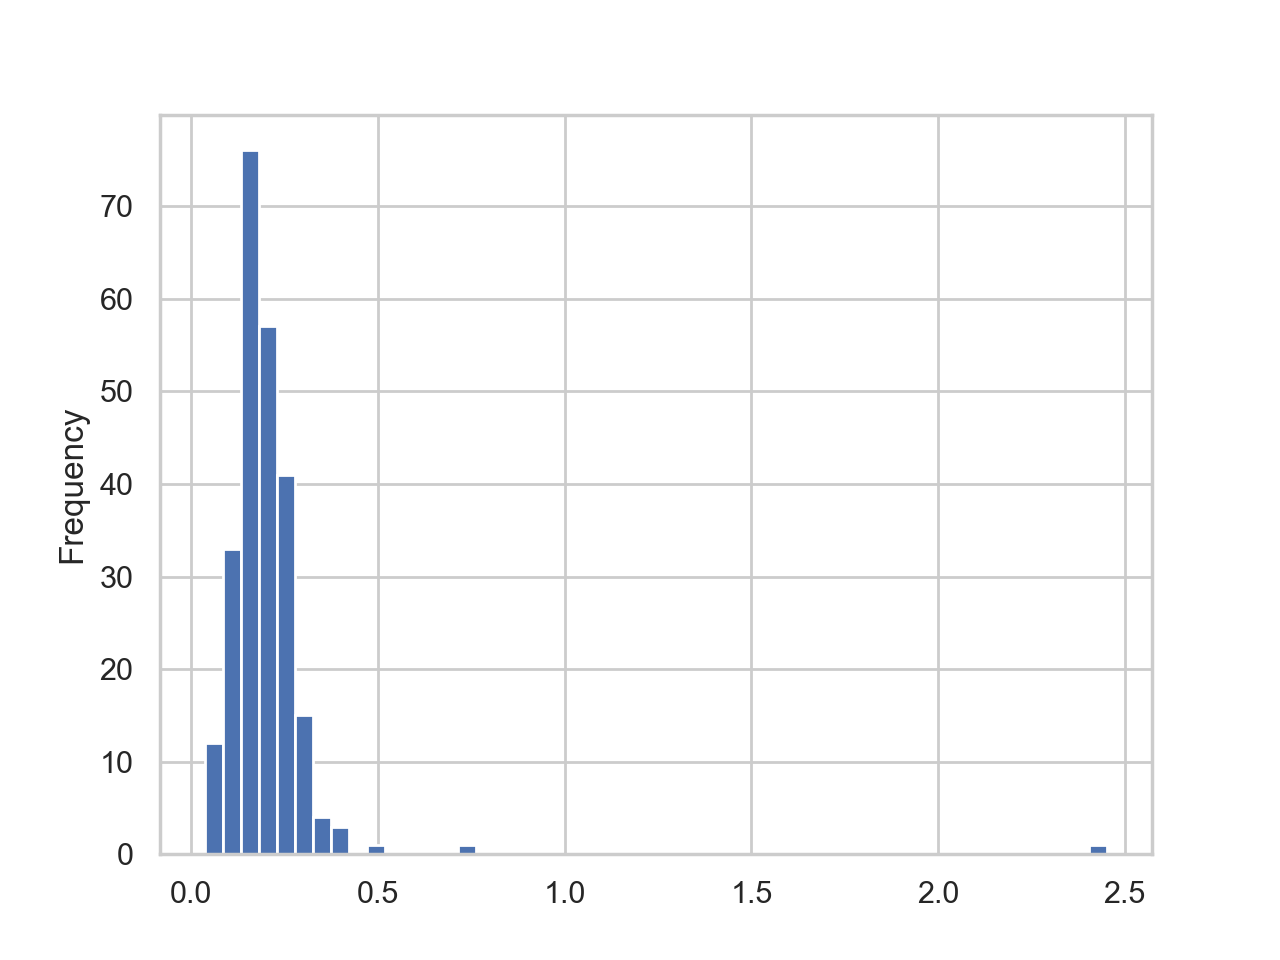

<AxesSubplot:ylabel='Frequency'>

In [36]:
plt.figure()
tips['tip_pct'].plot.hist(bins=50)

<IPython.core.display.Javascript object>


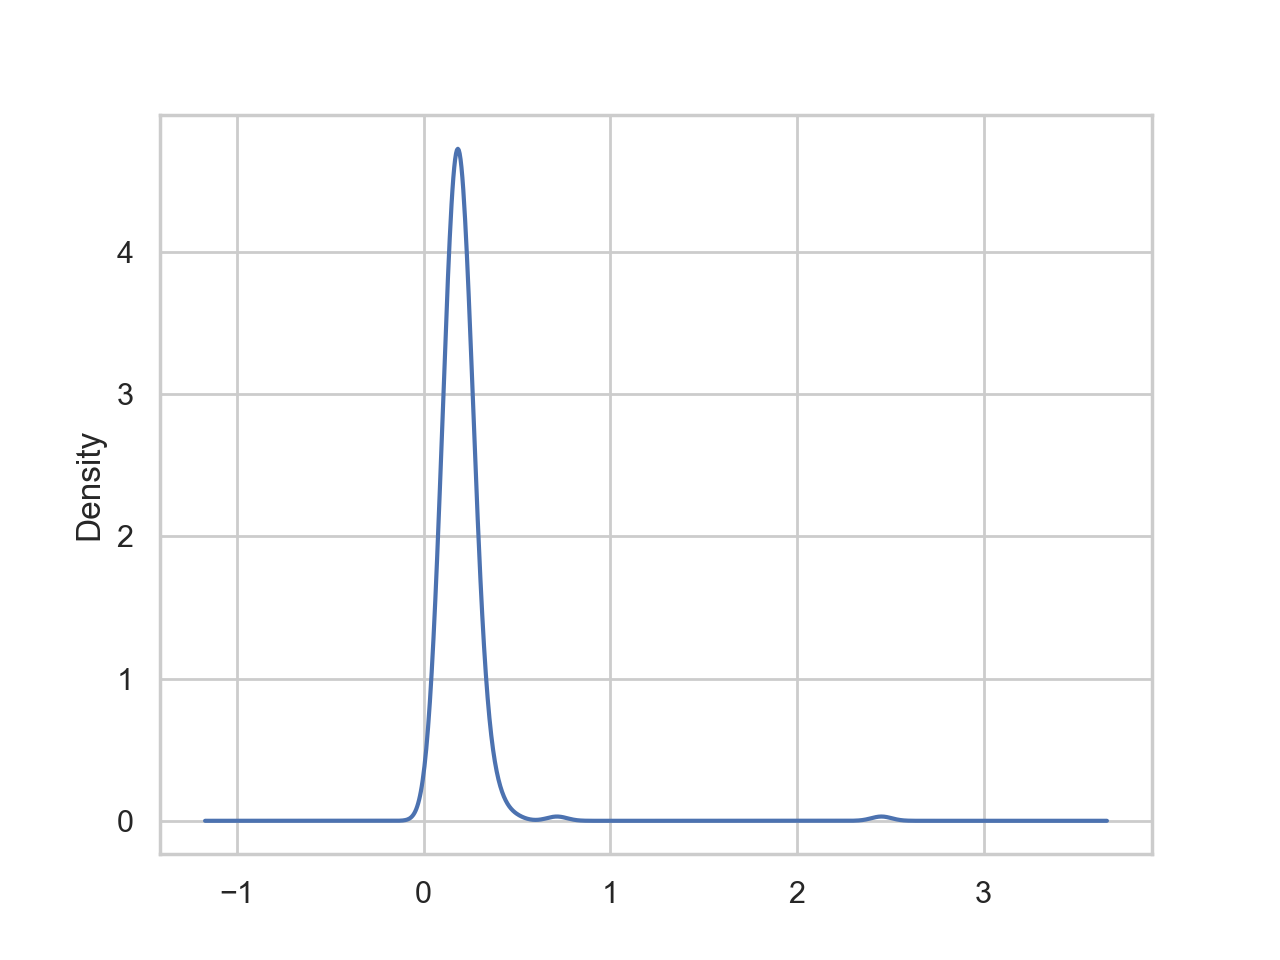

<AxesSubplot:ylabel='Density'>

In [37]:
plt.figure()
tips['tip_pct'].plot.density()

In [38]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

<IPython.core.display.Javascript object>


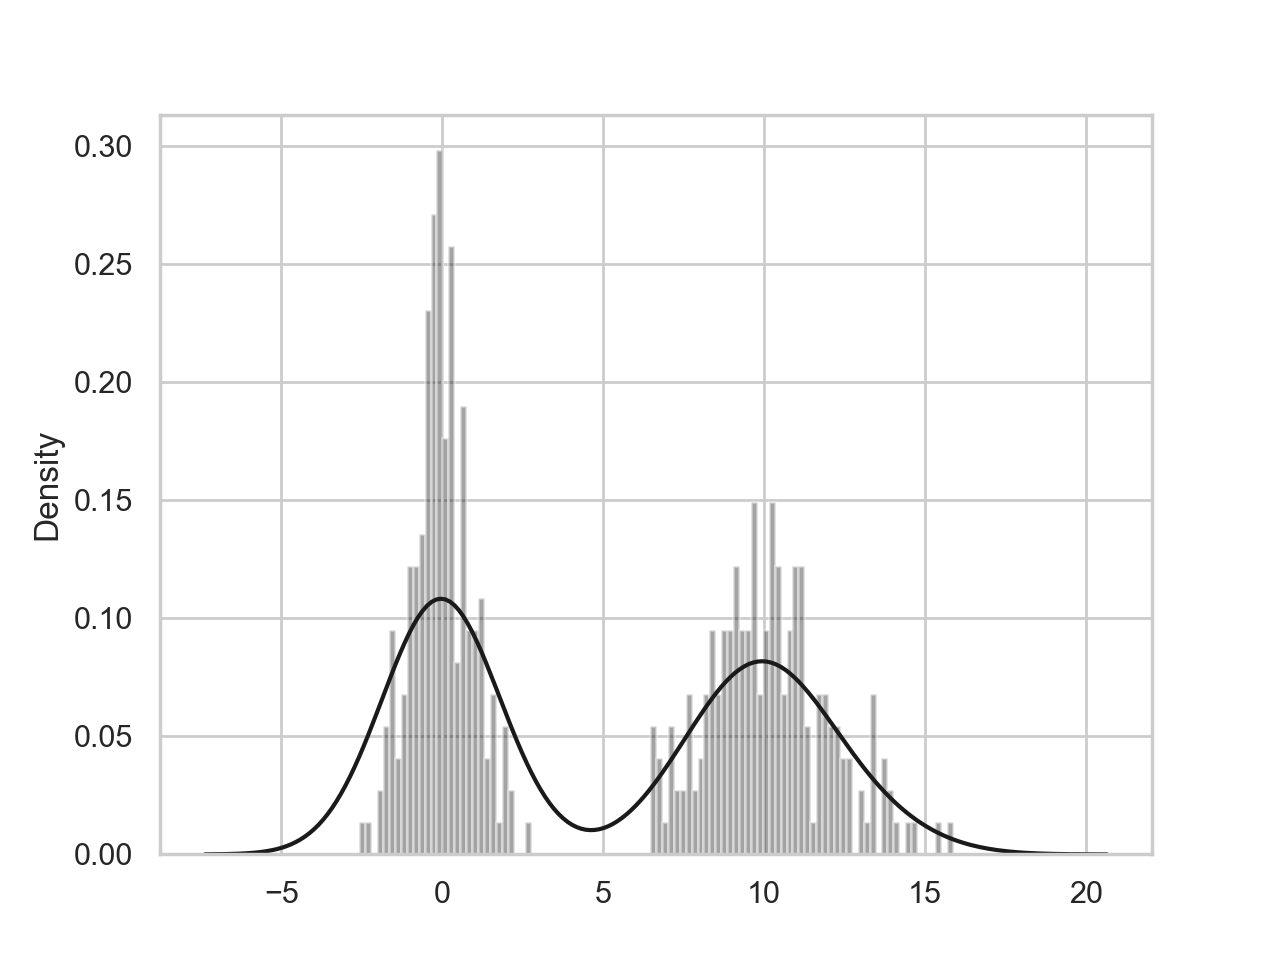

/Users/duoduo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

In [39]:
plt.figure()
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

In [40]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560

<IPython.core.display.Javascript object>


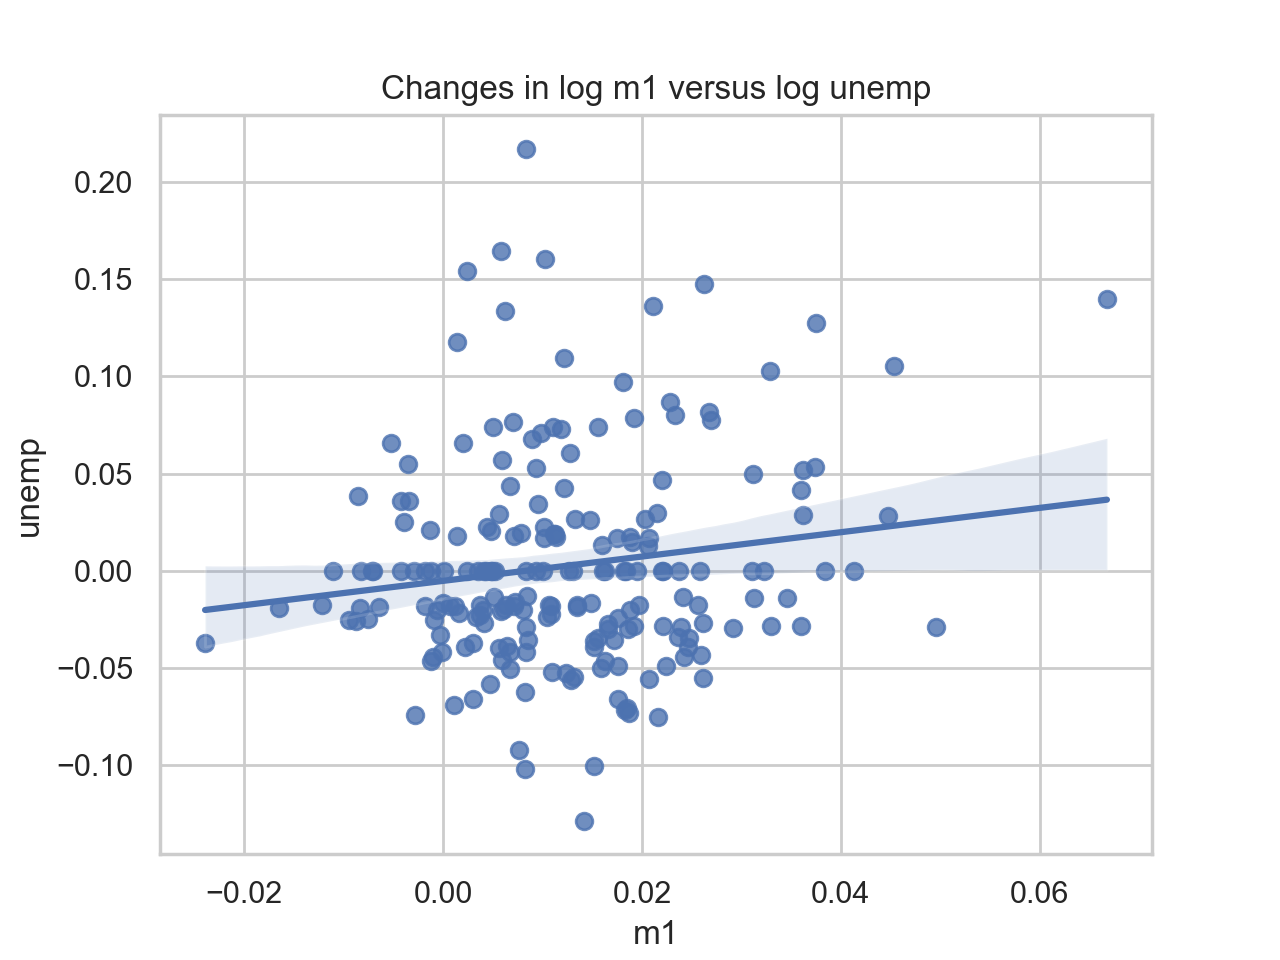

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

In [41]:
plt.figure()
sns.regplot(x='m1', y='unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

<IPython.core.display.Javascript object>


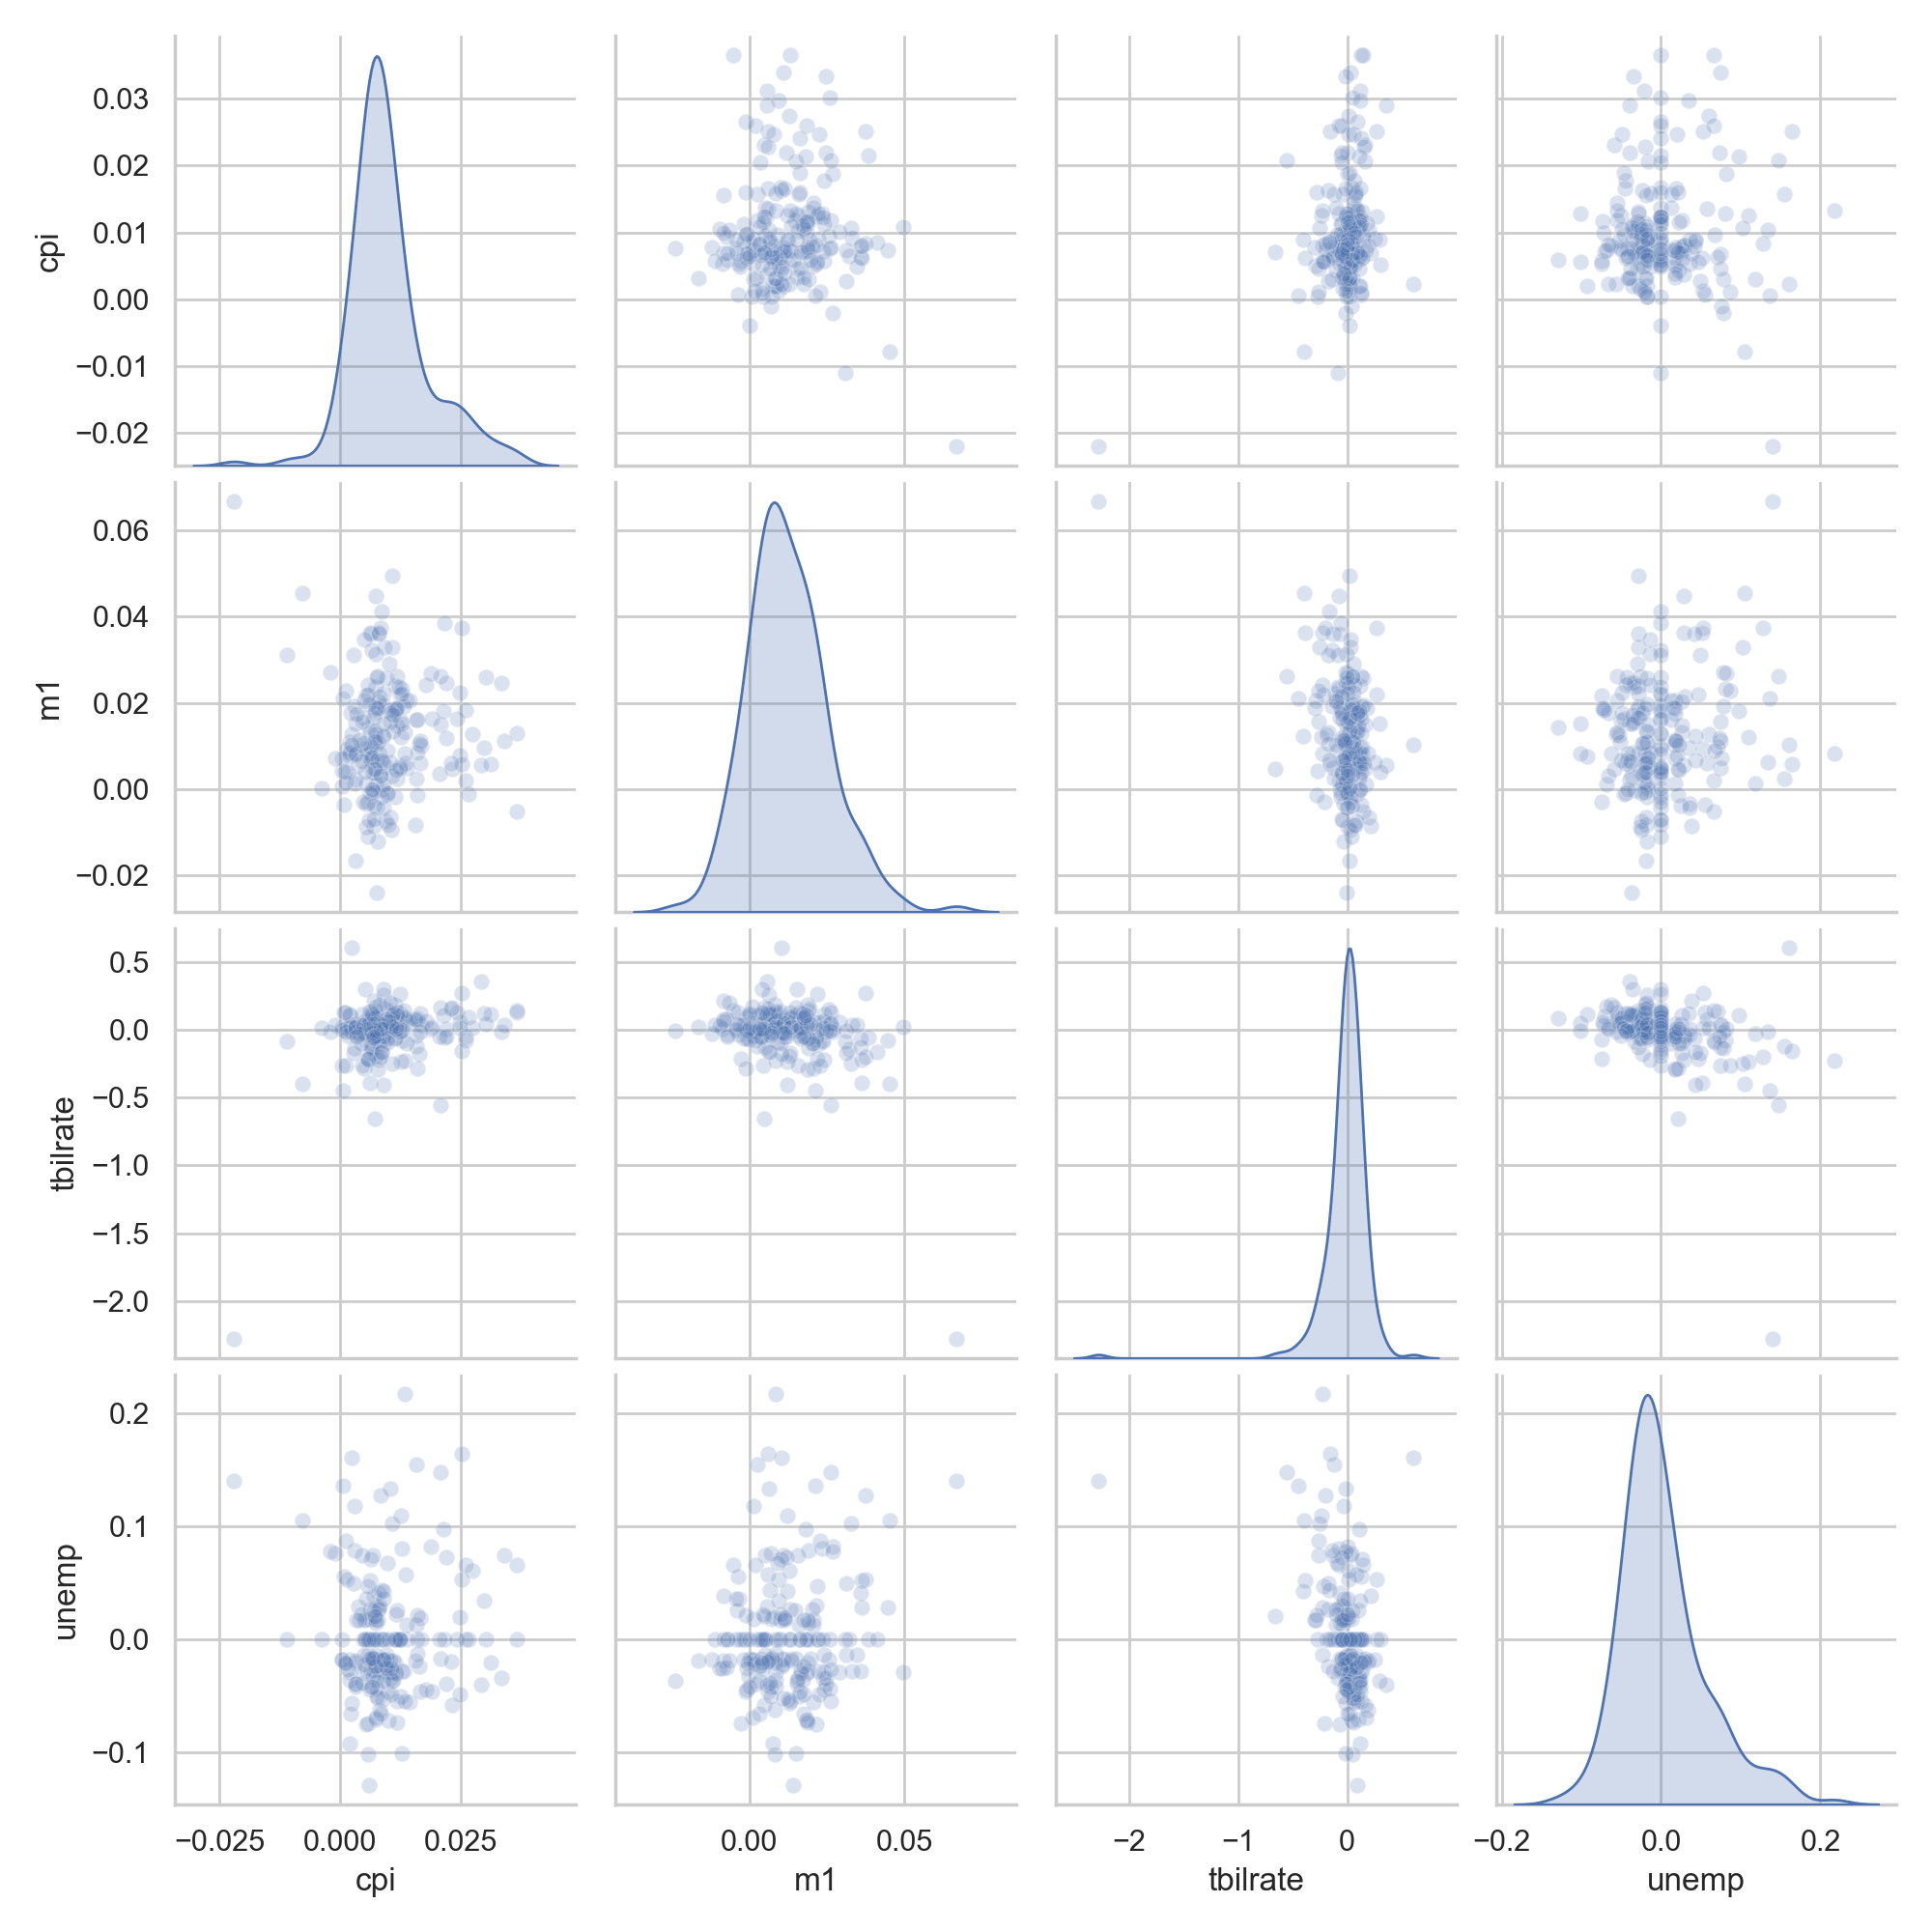

In [42]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

You may notice the `plot_kws` argument. This enables us to pass down configuration options to the individual plotting calls on the off-diagonal elements.

### Facet Grids and Categorical Data

<IPython.core.display.Javascript object>


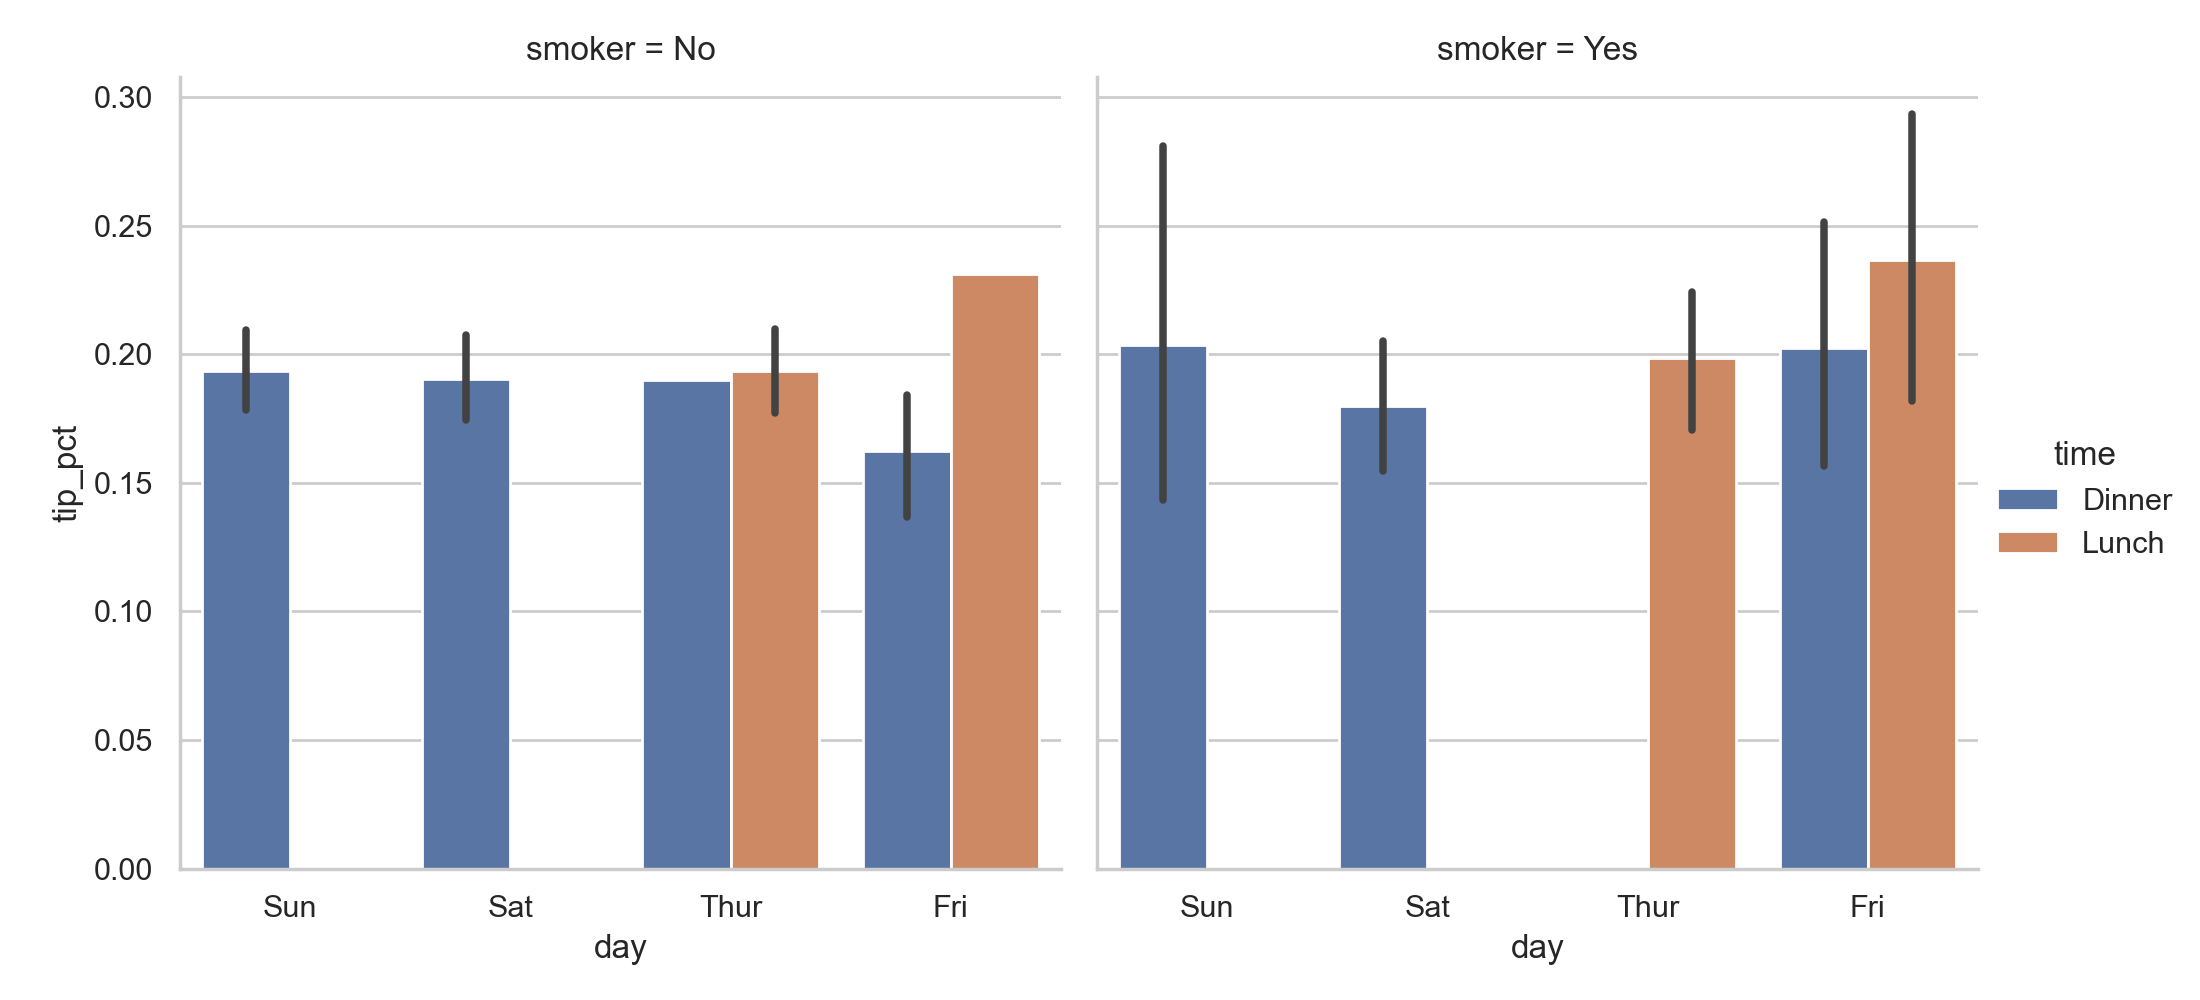

In [43]:
# The `factorplot` function has been renamed to `catplot`.
# sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


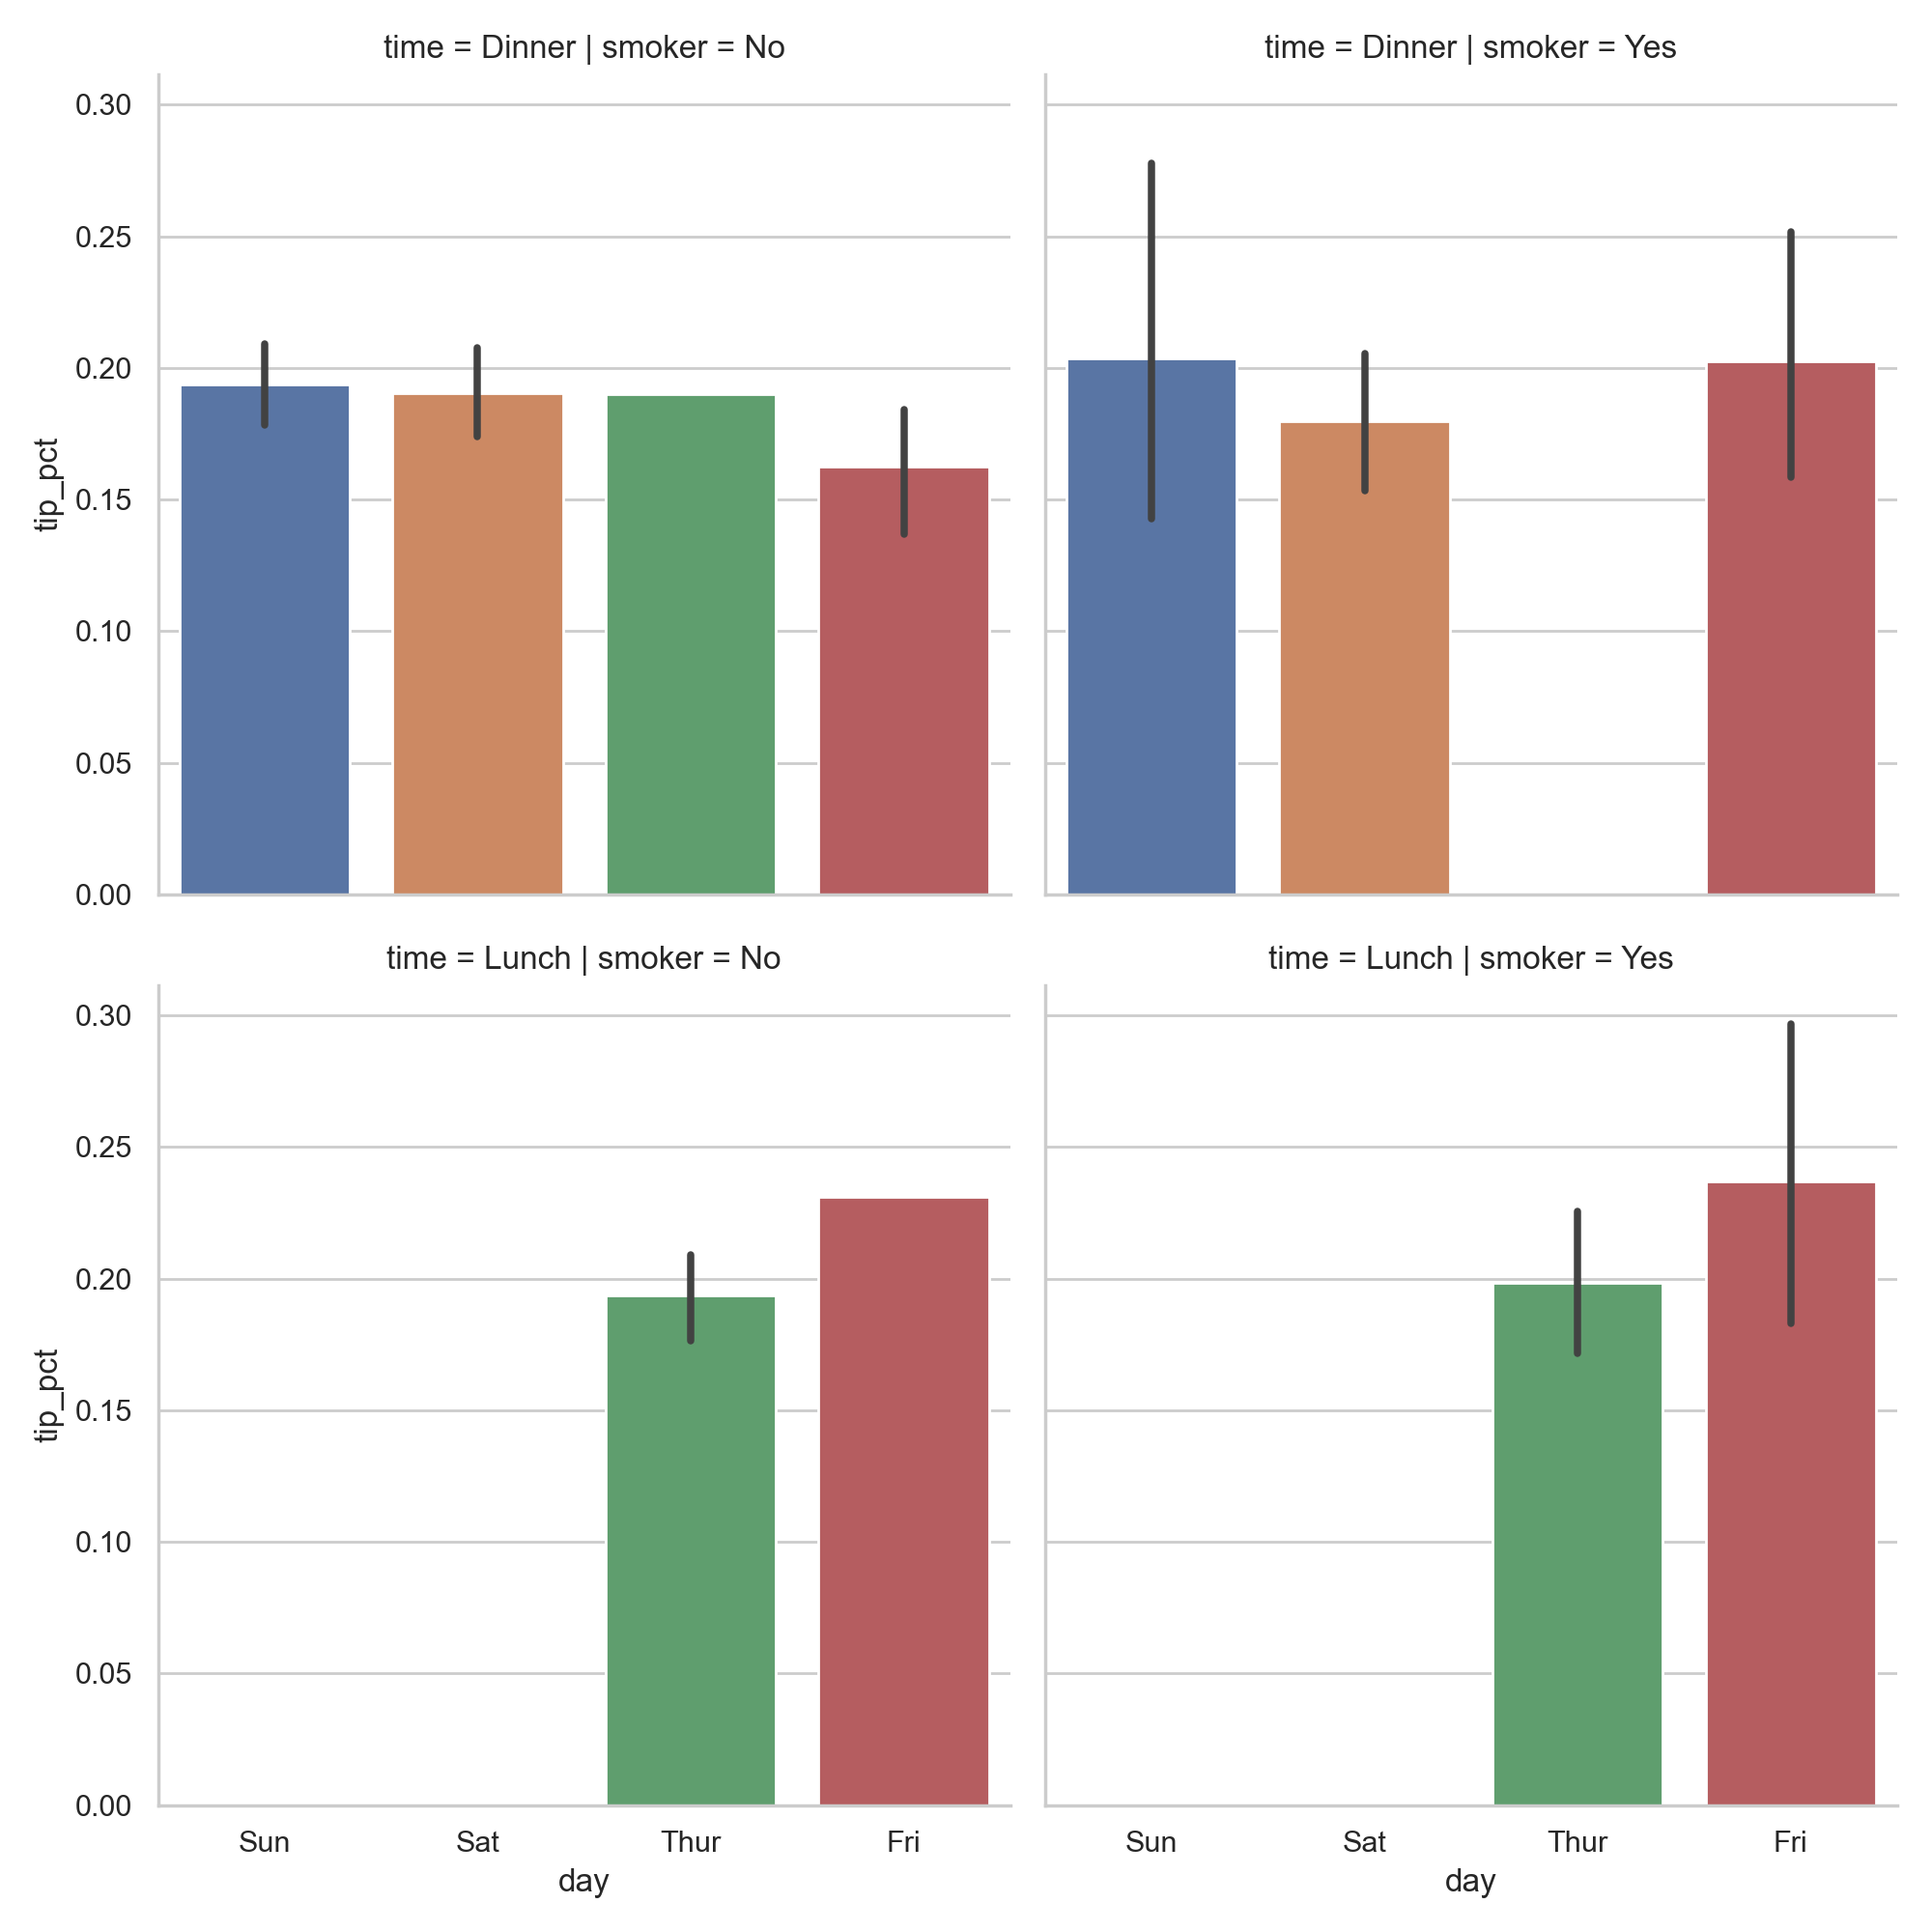

In [44]:
# sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


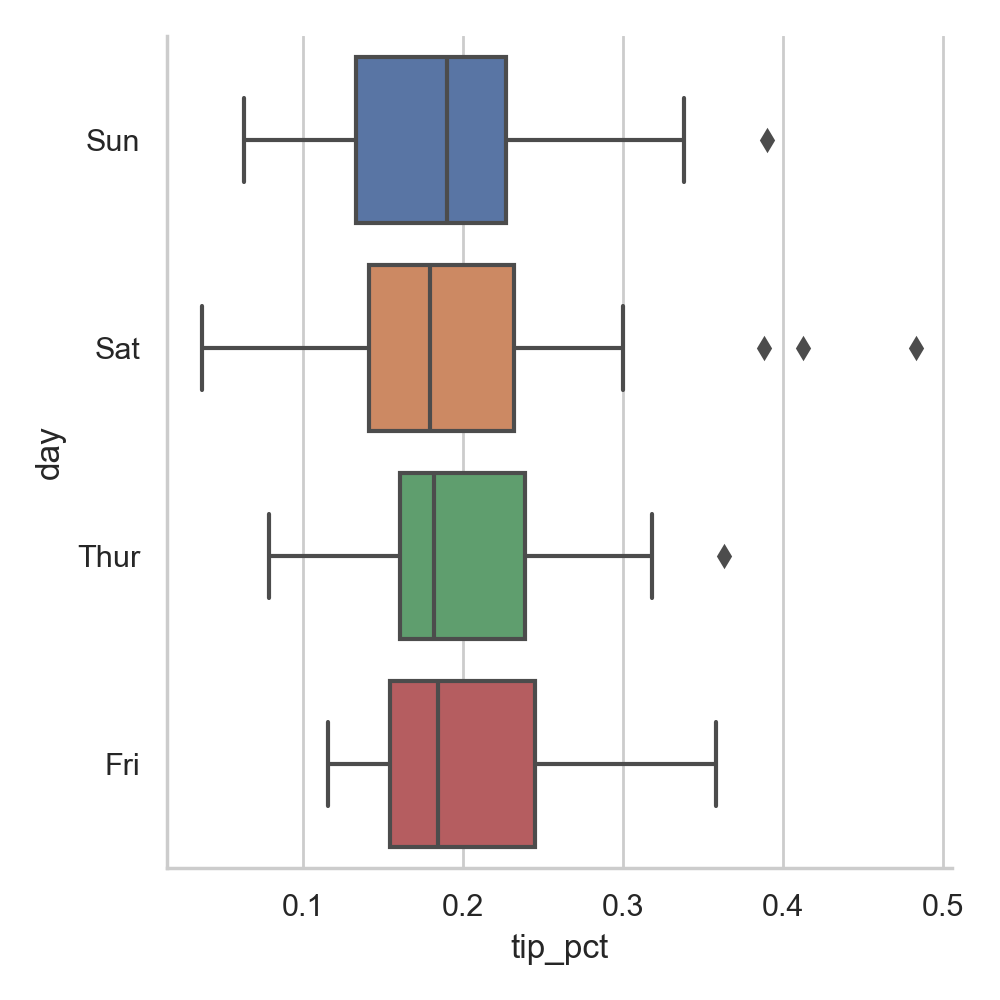

In [45]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

You can create your own facet grid plots using the more general `seaborn.FacetGrid` class.

## 9.3   Other Python Visualization Tools

With tools like Bokeh and Plotly, it’s now possible to specify dynamic, interactive graphics in Python that are destined for a web browser.